In [1]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# import pandas as pd
# pd.options.display.float_format = '{:.2f}'.format

In [1]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.geocoders import Nominatim
from time import sleep
from datetime import datetime

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# read the daily Volume
doh_weekday_factor=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_HOD_weekday.csv')
doh_weekend_factor=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_HOD_weekend.csv')

In [3]:
doh_weekday_factor.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor'], dtype='object')

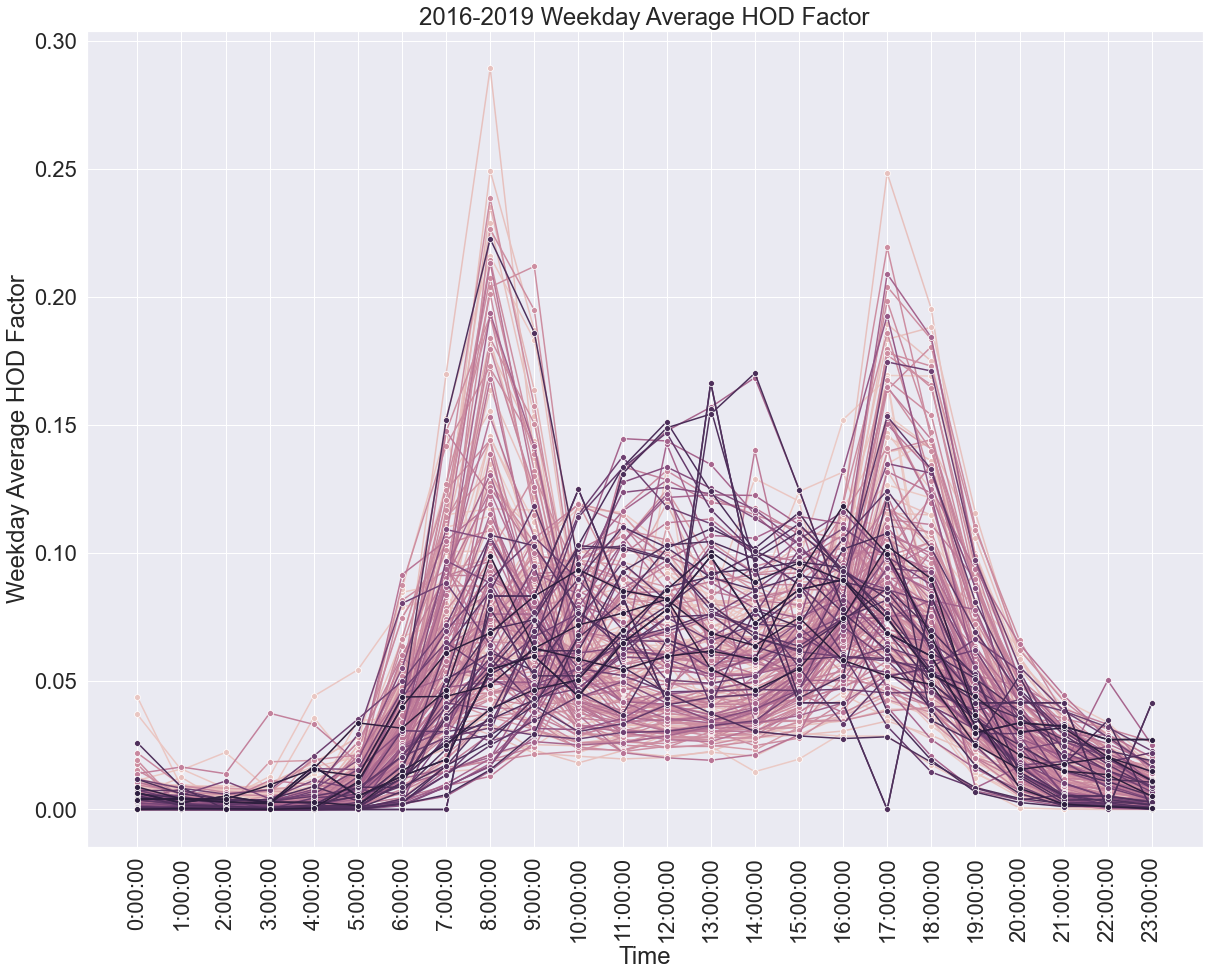

In [55]:
# Combined all 4 years together

sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2.0)
import seaborn as sns


#fig, ax = plt.subplots(2,2)

ax=sns.lineplot(x=doh_weekday_factor['starttime'],y=doh_weekday_factor['Average_Yearly_HOD_Factor'],hue=doh_weekday_factor['ID'],
                   markers=True,marker="o", dashes=False,sort=True) 
plt.xticks(rotation = 'vertical')
ax.get_legend().remove()
ax.title.set_text('2016-2019 Weekday Average HOD Factor')
ax.set_ylabel('Weekday Average HOD Factor' )
ax.set_xlabel('Time')
plt.show()

In [5]:
# read the indices
ind=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/Updated_indices.csv')
ind.head()

Unnamed: 0.1    ID  year   Max_WWI  Average_WWI  Weekday_Aergage_AMI  \
0             0   671  2016  2.232143     0.769600             0.703185   
1             1   671  2017  2.893617     0.776723             0.743791   
2             2   671  2018  1.352564     0.710009             0.863646   
3             3   671  2019  1.435644     0.660785             0.820369   
4             4  1127  2016  2.222222     0.257277             2.050485   

   Weekend_Aergage_AMI  Average AMI_wday_wend  Max_weekend_AMI  \
0             0.324525               2.166812         0.360694   
1             0.376689               1.974549         0.437975   
2             0.291176               2.966061         0.295405   
3             0.340759               2.407476         0.354620   
4             0.584499               3.508108         0.736655   

   Max_weekday_AMI  ...       state        country  Unnamed: 0    edgeUID  \
0         0.930693  ...  California  United States           0  308723101   
1         1.020619  ...  California  United States           0  308723101   
2         1.433566  ...  California  United States           0  308723101   
3         1.210702  ...  California  United States           0  308723101   
4         2.235149  ...  California  United States           1  308779961   

       osmId  stv_total  stv_com_total stv_rec_total  stv_com_ratio  \
0  215845474        NaN            NaN           NaN            NaN   
1  215845474        NaN            NaN           NaN            NaN   
2  215845474     4890.0          260.0        4630.0       0.053170   
3  215845474     4625.0          255.0        4370.0       0.055135   
4   87297166        NaN            NaN           NaN            NaN   

  stv_rec_ratio  
0           NaN  
1           NaN  
2      0.946830  
3      0.944865  
4           NaN  

[5 rows x 40 columns]

In [6]:
ind.shape

(595, 40)

# Separate weekday Pattern using Max weekday AMI_PMI Value threshold

In [7]:
ind['county'].unique()

array([nan, 'Orange County', 'Alameda County', 'San Diego County',
       'CAL Fire San Diego Unit', 'Marin County', 'San Mateo County',
       'Los Angeles County', 'Contra Costa County', 'El Dorado County',
       'Douglas County', 'Placer County', 'Washoe County',
       'Humboldt County', 'San Luis Obispo County'], dtype=object)

In [8]:
# exclude El darado county
ind1=ind.loc[ind['county']!='El Dorado County']
ind2=ind1.loc[ind['county']!='Douglas County']
ind3=ind2.loc[ind['county']!='Placer County']

In [9]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am/pm_value', 'max_weekend_am/pm', 'max_weekend_am_pm_Value',
       'max_weekday_am/pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [10]:
doh_weekday_factor.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor'], dtype='object')

In [11]:
max_ami_pmi=pd.DataFrame({'Average_max_ami_pmi':ind.groupby(['ID'])['max_weekday_am_pm_value'].mean()}).reset_index()
max_ami_pmi.shape

(184, 2)

In [12]:
max_ami_pmi['Average_max_ami_pmi'].describe()

count    183.000000
mean            inf
std             NaN
min        0.298198
25%        1.290880
50%        2.108637
75%        4.535714
max             inf
Name: Average_max_ami_pmi, dtype: float64

In [13]:
doh_weekday_factor.shape

(5328, 4)

In [14]:
weekday_data=pd.merge(doh_weekday_factor,max_ami_pmi, left_on=['ID'],right_on=['ID'],how='inner')
weekday_data.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor',
       'Average_max_ami_pmi'],
      dtype='object')

In [15]:
def plot (weekday_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekday_data['starttime'],y=weekday_data['Average_Yearly_HOD_Factor'],hue=weekday_data['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Weekday Average HOD Factor')
    ax.set_ylabel('Weekday Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [16]:
def plot_ave (d1_ave):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=d1_ave['starttime'],y=d1_ave['Average_Group_HOD_Factor'],
                       markers=True,marker="o", dashes=False, sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.title.set_text('2016-2019 Weekday Average HOD Factor')
    ax.set_ylabel('Weekday Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [17]:
from pandas.api.types import CategoricalDtype
cats = [ '0:00:00','1:00:00','2:00:00','3:00:00','4:00:00','5:00:00','6:00:00','7:00:00','8:00:00','9:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00']
cat_type = CategoricalDtype(categories=cats, ordered=True)


In [18]:
d1=weekday_data.loc[weekday_data['Average_max_ami_pmi']<=1.0]
d1_ave=pd.DataFrame({'Average_Group_HOD_Factor':d1.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()
d2=weekday_data[(weekday_data.Average_max_ami_pmi>1)& (weekday_data.Average_max_ami_pmi<=2.5) ]
d2_ave=pd.DataFrame({'Average_Group_HOD_Factor':d2.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()
#d3=weekend_data[(weekend_data.Average_max_ami_pmi>2.5)& (weekend_data.Average_max_ami_pmi<=3.5) ]
d3=weekday_data.loc[weekday_data['Average_max_ami_pmi']>2.5]
d3_ave=pd.DataFrame({'Average_Group_HOD_Factor':d3.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()

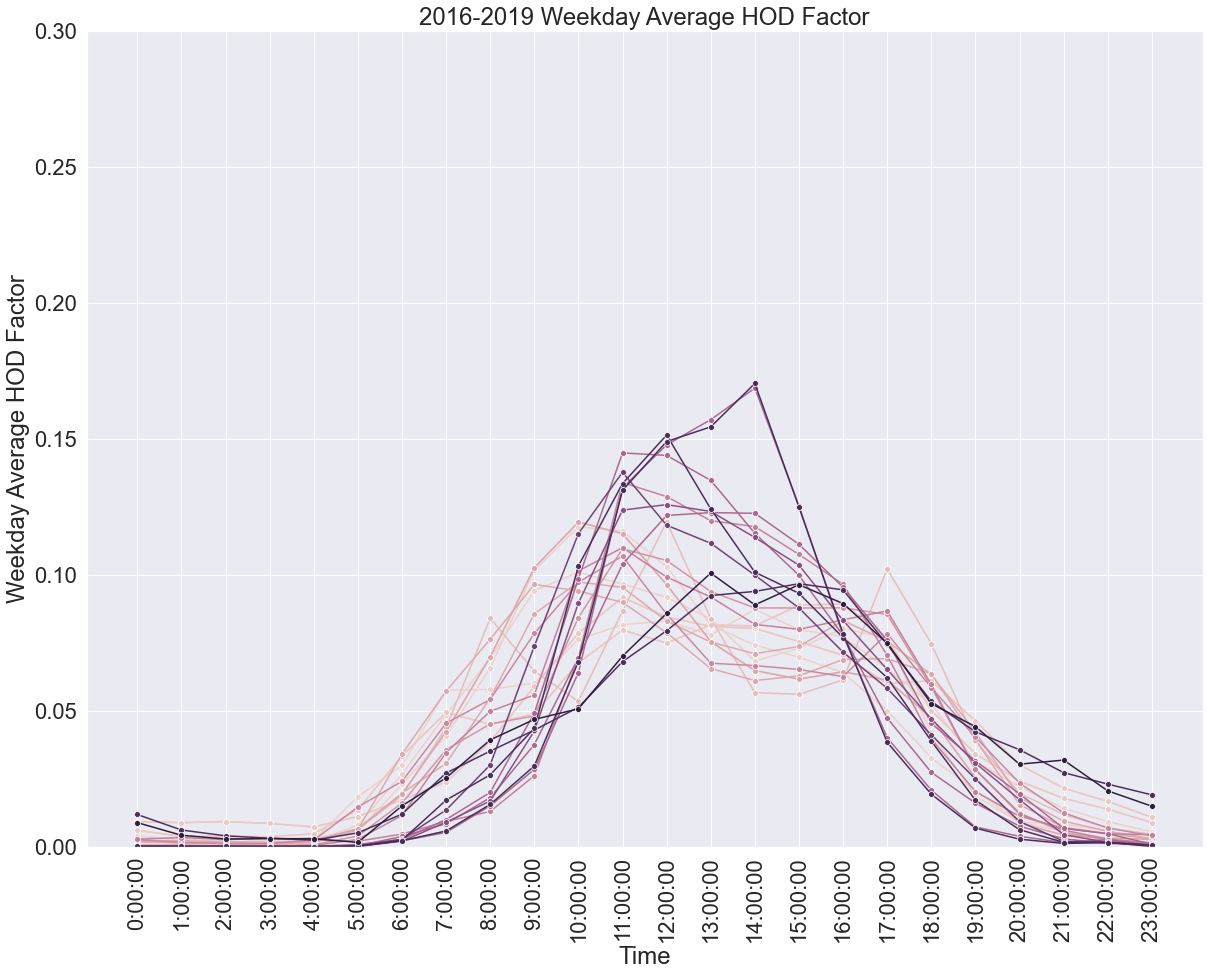

In [19]:
plot(d1)

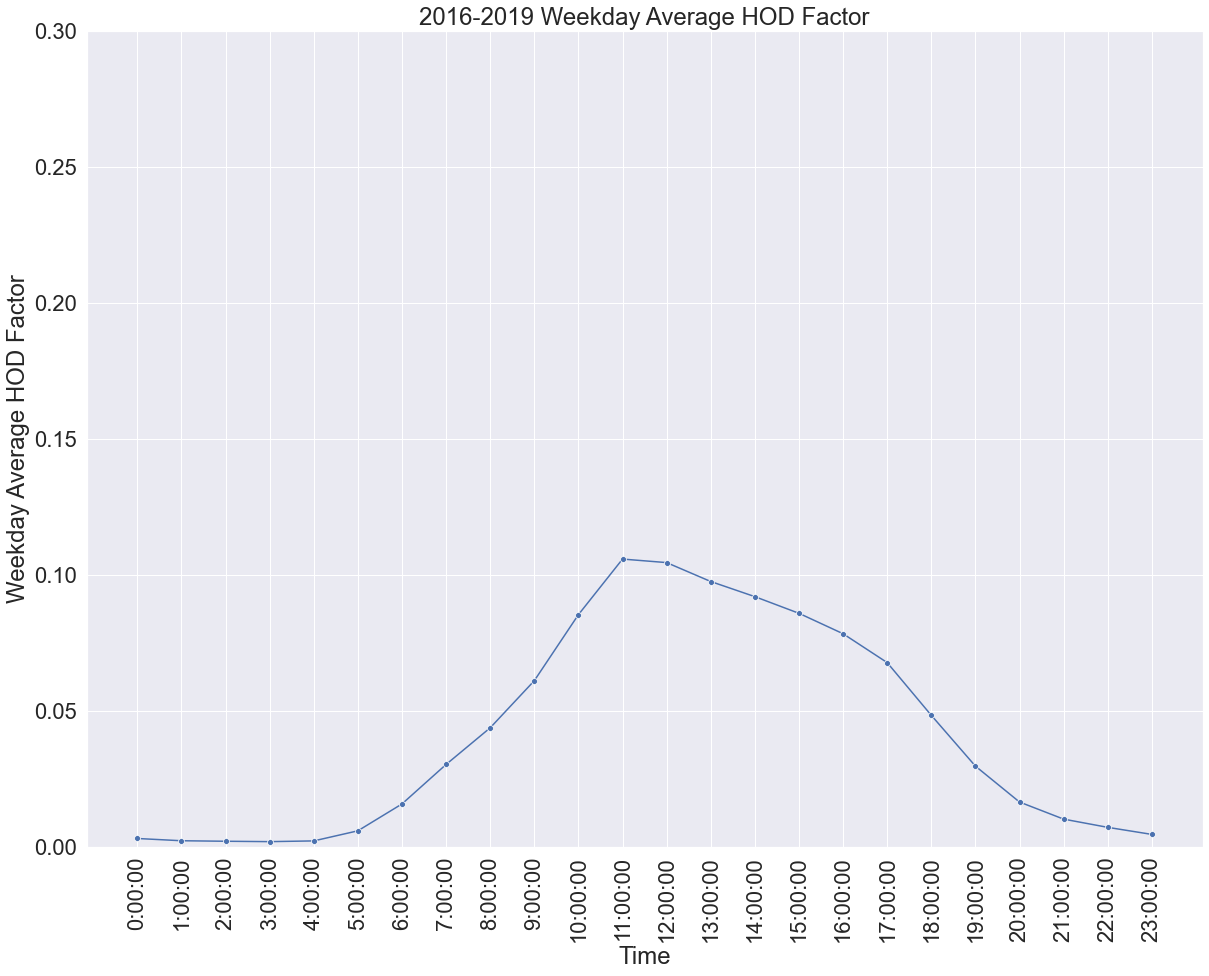

In [20]:
d1_ave['starttime'] = d1_ave['starttime'].astype(cat_type)
plot_ave(d1_ave)

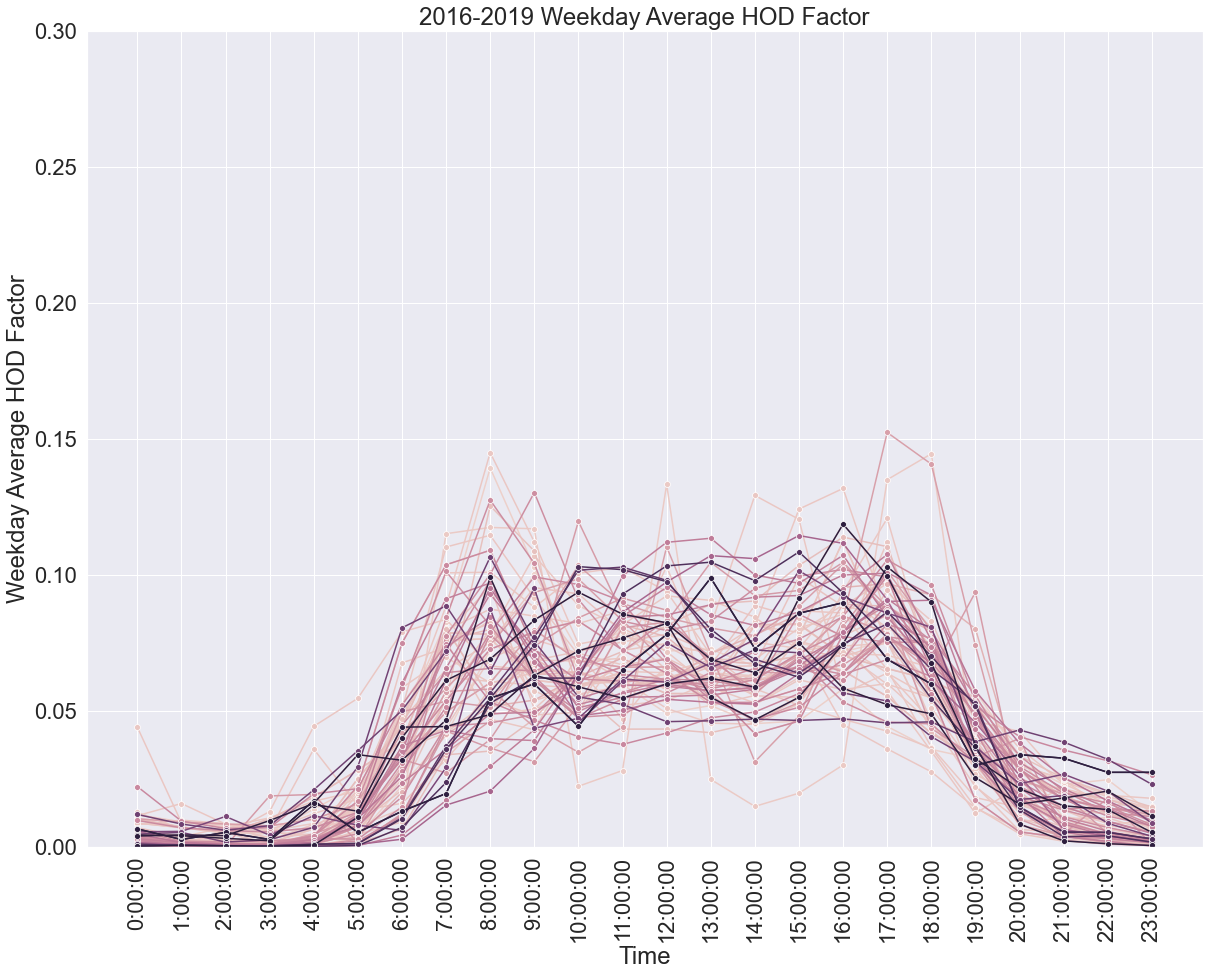

In [21]:
plot(d2)

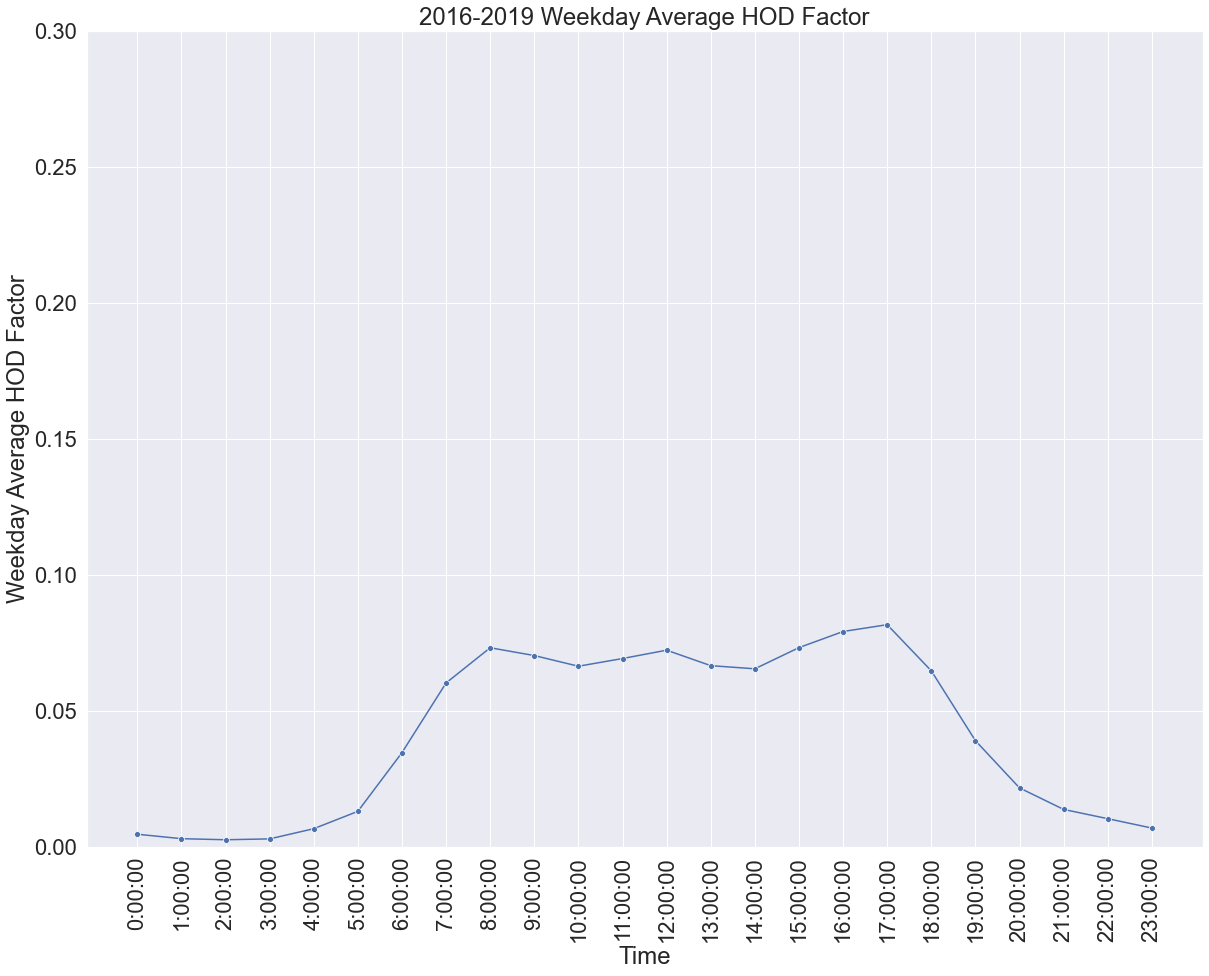

In [22]:
d2_ave['starttime'] = d2_ave['starttime'].astype(cat_type)
plot_ave(d2_ave)

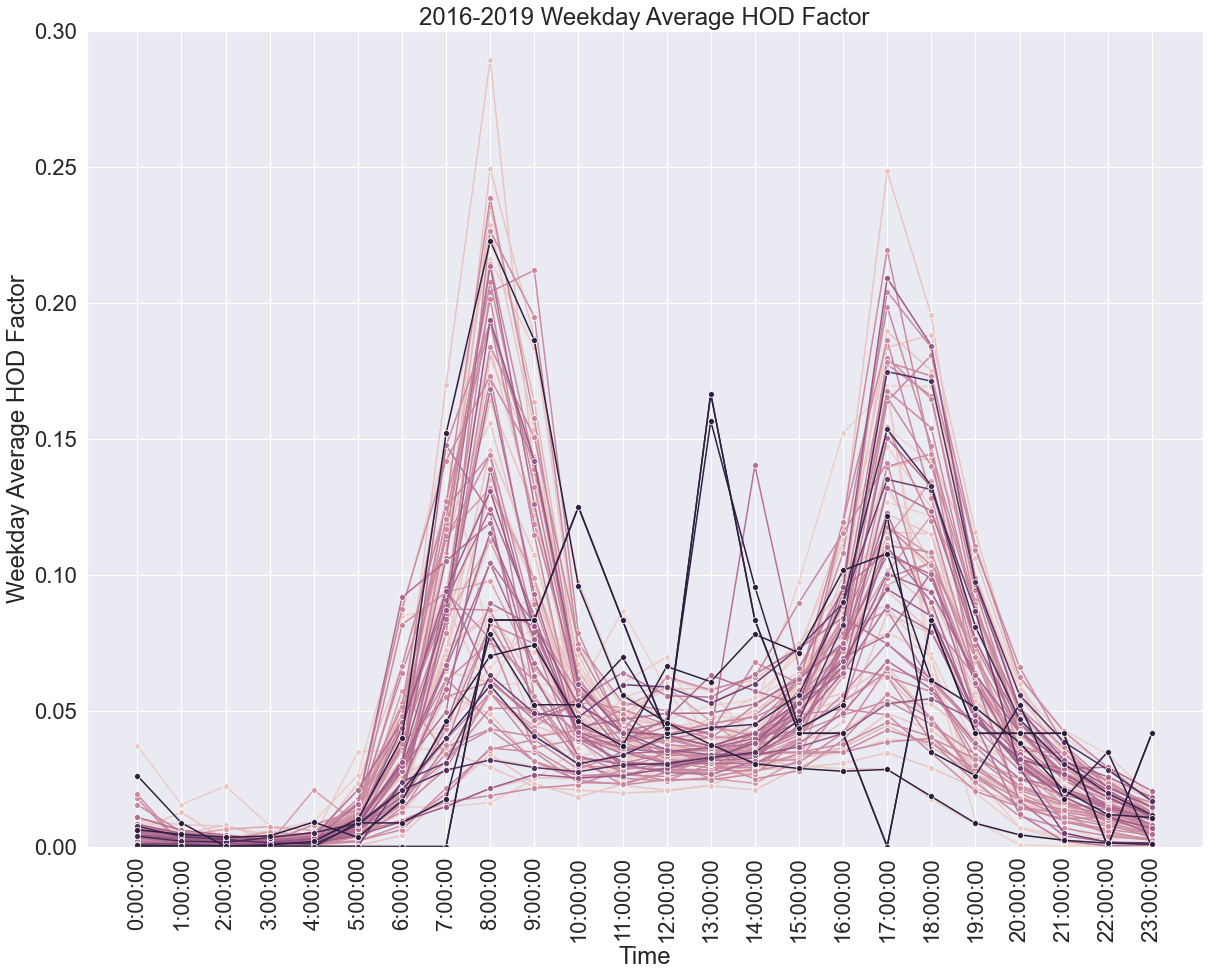

In [23]:
plot(d3)

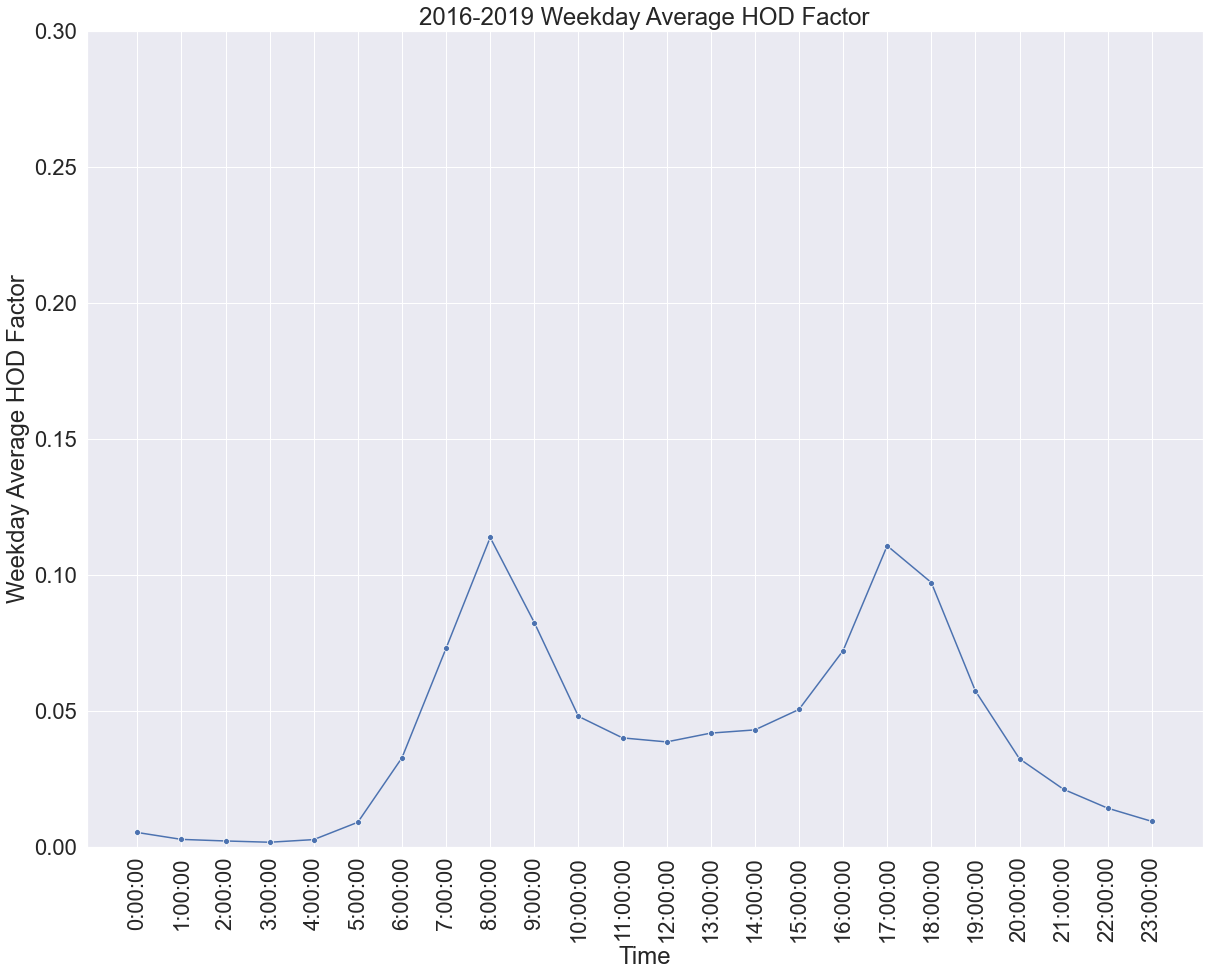

In [24]:
d3_ave['starttime'] = d3_ave['starttime'].astype(cat_type)
plot_ave(d3_ave)

In [30]:
d1_ave=d1_ave.sort_values(by=['starttime'])
d2_ave=d2_ave.sort_values(by=['starttime'])
d3_ave=d3_ave.sort_values(by=['starttime'])

# Export Final HOD Factor

In [60]:
d1_ave['Criteria']='Max_AMI_PMI<=1'
d2_ave['Criteria']='1<Max_AMI_PMI<=2.5'
d3_ave['Criteria']='Max_AMI_PMI>2.5'
Final_weekday_HOD=pd.concat([d1_ave,d2_ave,d3_ave],axis=0)
Final_weekday_HOD['day_of_status']='weekday'
Final_weekday_HOD.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Weekday_HOD_Factor.csv')

In [61]:
d1_ave.dtypes

starttime                   category
Average_Group_HOD_Factor     float64
Criteria                      object
dtype: object

# Separate weekend Pattern using Max weekday AMI_PMI Value threshold

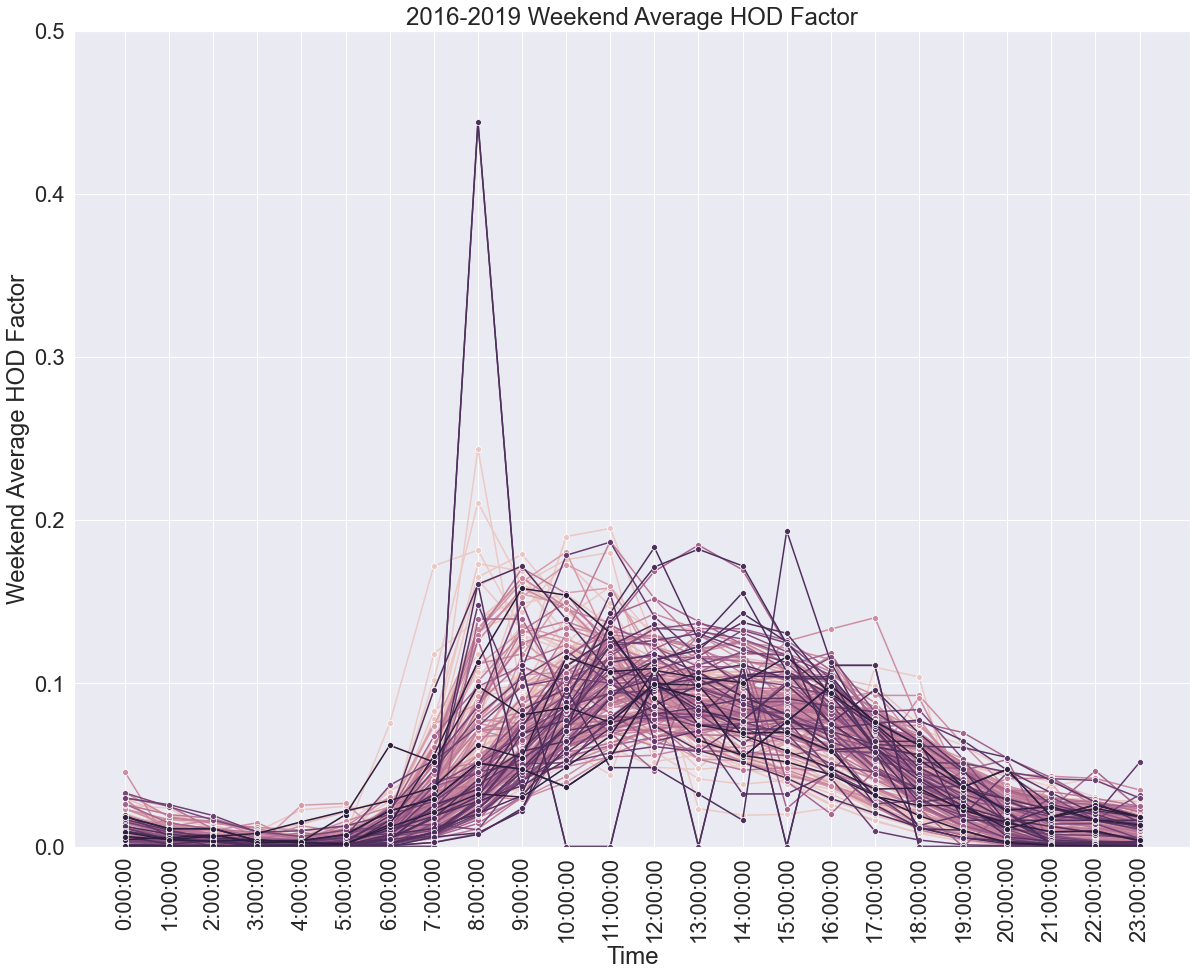

In [62]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2.0)
import seaborn as sns


#fig, ax = plt.subplots(2,2)

ax=sns.lineplot(x=doh_weekend_factor['starttime'],y=doh_weekend_factor['Average_Yearly_HOD_Factor'],hue=doh_weekend_factor['ID'],
                   markers=True,marker="o", dashes=False,sort=True) 
plt.xticks(rotation = 'vertical')
ax.set(ylim=(0, 0.50))
ax.get_legend().remove()
ax.title.set_text('2016-2019 Weekend Average HOD Factor')
ax.set_ylabel('Weekend Average HOD Factor' )
ax.set_xlabel('Time')
plt.show()

In [63]:
max_ami_pmi_rec=pd.DataFrame({'Average_stv_rec_ratio':ind.groupby(['ID'])['stv_rec_ratio'].mean()}).reset_index()
max_ami_pmi_rec.shape

(184, 2)

In [64]:
max_ami_pmi_com=pd.DataFrame({'Average_stv_com_ratio':ind.groupby(['ID'])['stv_com_ratio'].mean()}).reset_index()
max_ami_pmi_com.shape

(184, 2)

In [65]:
max_ami_pmi_weekend=pd.merge(max_ami_pmi_rec,max_ami_pmi_com, left_on=['ID'],right_on=['ID'],how='inner')

In [66]:
max_ami_pmi_weekend.describe()

ID  Average_stv_rec_ratio  Average_stv_com_ratio
count    184.000000             163.000000             163.000000
mean   17813.652174               0.721615               0.278385
std    15607.138487               0.218743               0.218743
min      671.000000               0.255080               0.000000
25%     3913.500000               0.551677               0.098082
50%    18374.500000               0.798981               0.201019
75%    23303.500000               0.901918               0.448323
max    59066.000000               1.000000               0.744920

In [67]:
weekend_data=pd.merge(doh_weekend_factor,max_ami_pmi_weekend, left_on=['ID'],right_on=['ID'],how='inner')
weekend_data.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor',
       'Average_stv_rec_ratio', 'Average_stv_com_ratio'],
      dtype='object')

In [68]:
c=weekend_data.loc[weekend_data['Average_Yearly_HOD_Factor']>0.25]
c

Unnamed: 0     ID starttime  Average_Yearly_HOD_Factor  \
4064        4976  50994   8:00:00                   0.444444   
4088        5000  50997   8:00:00                   0.444444   

      Average_stv_rec_ratio  Average_stv_com_ratio  
4064               0.860037               0.139963  
4088               0.860037               0.139963

In [69]:
weekend_data1=weekend_data.loc[weekend_data['ID']!=50994]
weekend_data2=weekend_data1.loc[weekend_data1['ID']!=50997]

In [70]:
def plot_weekend (weekend_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekend_data['starttime'],y=weekend_data['Average_Yearly_HOD_Factor'],hue=weekend_data['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Weekend Average HOD Factor')
    ax.set_ylabel('Weekend Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [71]:
def plot_weekend_ave (weekend_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekend_data['starttime'],y=weekend_data['Average_Group_HOD_Factor'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.title.set_text('2016-2019 Weekend Average HOD Factor')
    ax.set_ylabel('Weekend Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [72]:
d1w=weekend_data2.loc[weekend_data2['Average_stv_rec_ratio']<=0.75]
d1w_ave=pd.DataFrame({'Average_Group_HOD_Factor':d1w.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()
#d2w=weekend_data2[(weekend_data2.Average_stv_rec_ratio>0.6)& (weekend_data2.Average_stv_rec_ratio<=0.90) ]
#d3=weekend_data[(weekend_data.Average_max_ami_pmi>2.5)& (weekend_data.Average_max_ami_pmi<=3.5) ]
d2w=weekend_data2.loc[weekend_data2['Average_stv_rec_ratio']>0.75]
d2w_ave=pd.DataFrame({'Average_Group_HOD_Factor':d2w.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()

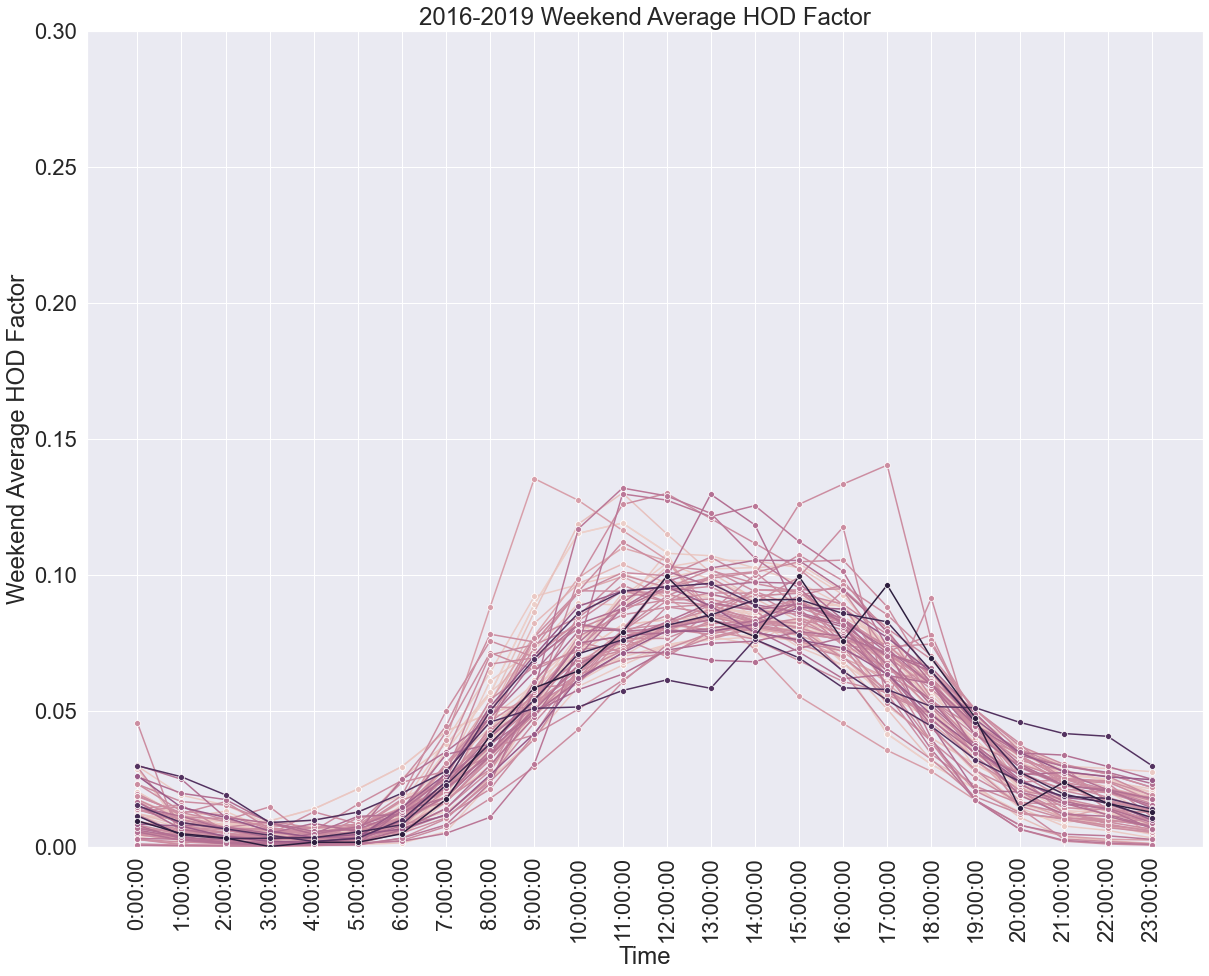

In [73]:
plot_weekend(d1w)

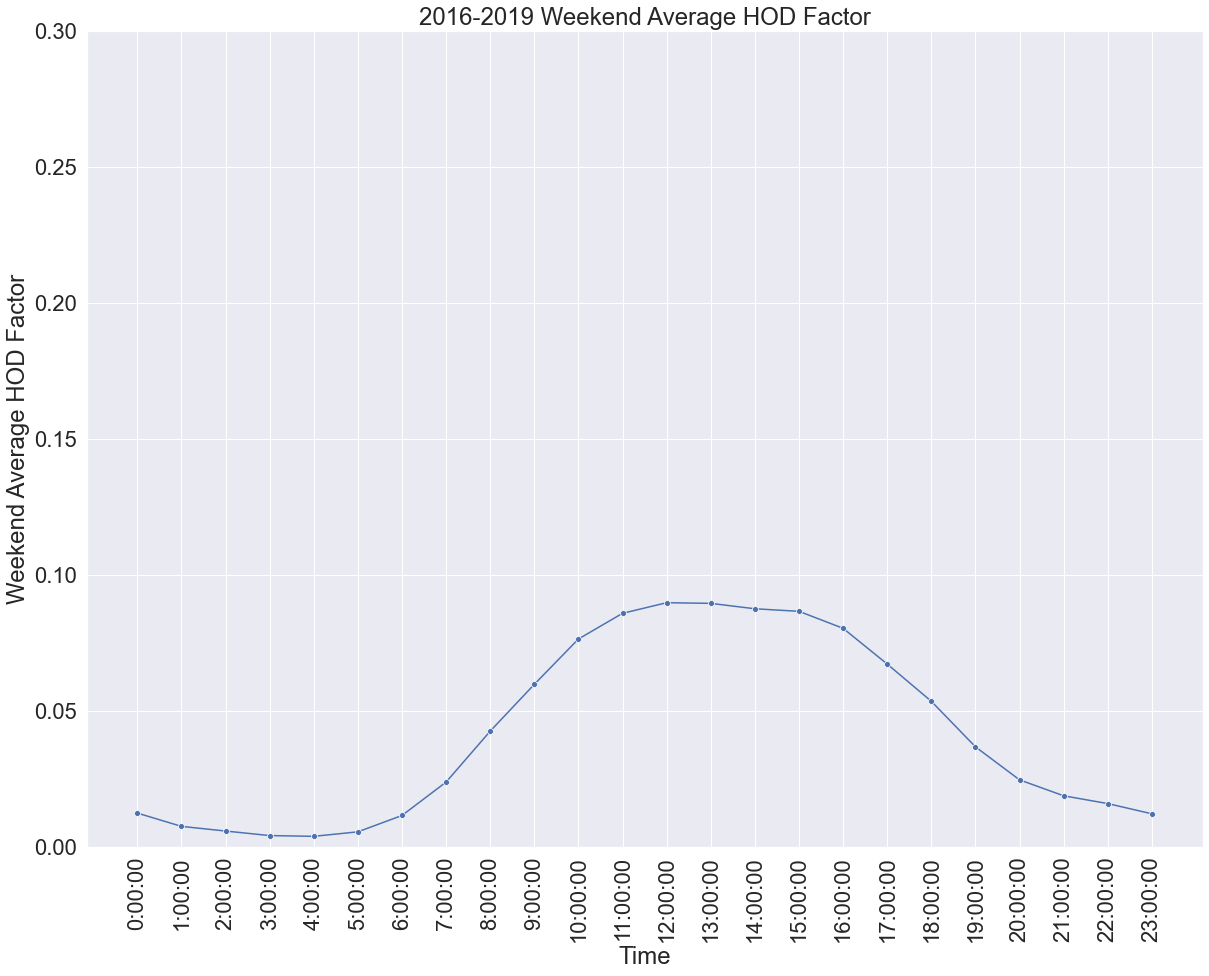

In [74]:
d1w_ave['starttime'] = d1w_ave['starttime'].astype(cat_type)
plot_weekend_ave(d1w_ave)

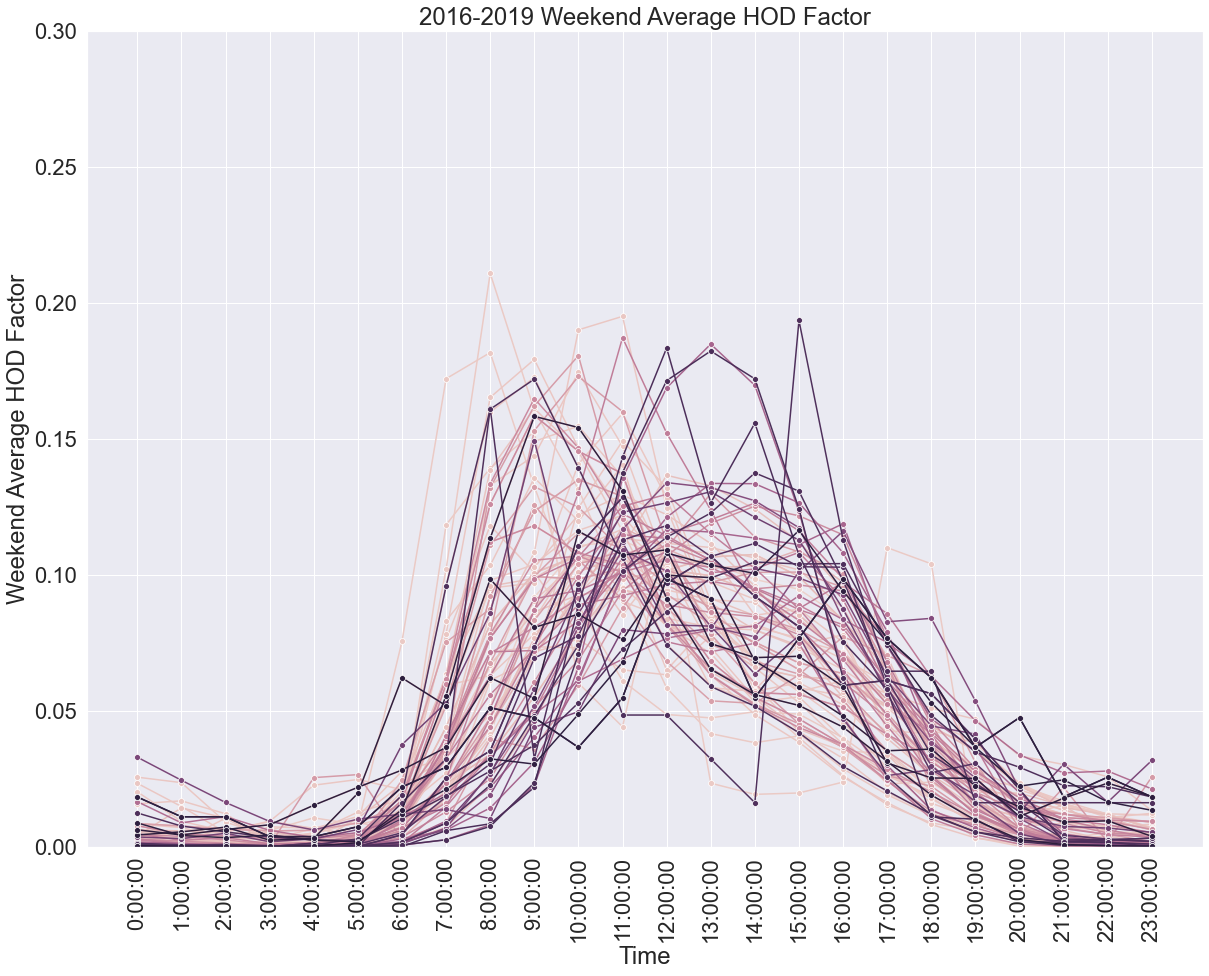

In [75]:
plot_weekend(d2w)

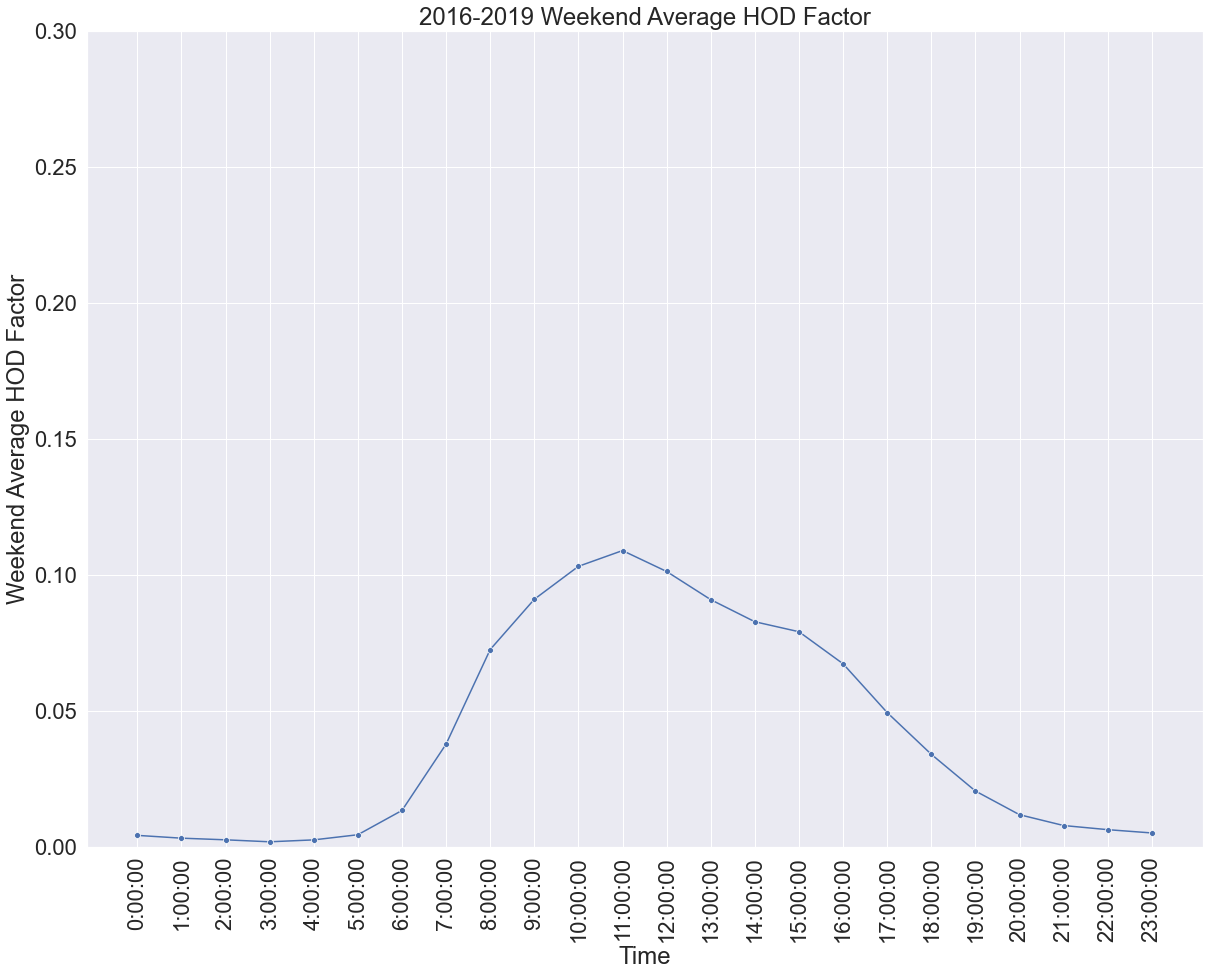

In [76]:
d2w_ave['starttime'] = d2w_ave['starttime'].astype(cat_type)
plot_weekend_ave(d2w_ave)

In [77]:
# Import Final HOD Factor for weekend
d1w_ave=d1w_ave.sort_values(by=['starttime'])
d2w_ave=d2w_ave.sort_values(by=['starttime'])
d2w_ave.head(2)

starttime  Average_Group_HOD_Factor
0    0:00:00                  0.004111
11   1:00:00                  0.003084

In [78]:
d1w_ave['Criteria']='Average_stv_rec_ratio<=0.75'
d1w_ave['Criteria']='Average_stv_rec_ratio>0.75'
Final_weekend_HOD=pd.concat([d1w_ave,d1w_ave],axis=0)
Final_weekend_HOD['day_of_status']='weekend'
Final_HOD=pd.concat([Final_weekday_HOD,Final_weekend_HOD],axis=0)
Final_HOD.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Final_HOD_Factor.csv')

# Break Down DOW Factor Pattern based on WWI Index 0.4 amd >0.4

In [80]:
DOW=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_DOW.csv')
DOW.head()

Unnamed: 0   ID Day of Week  Average_Yearly_DOW_Factor
0           0  671      Monday                   0.112653
1           1  671     Tuesday                   0.117616
2           2  671   Wednesday                   0.110507
3           3  671    Thursday                   0.131515
4           4  671      Friday                   0.119910

In [81]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am/pm_value', 'max_weekend_am/pm', 'max_weekend_am_pm_Value',
       'max_weekday_am/pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [82]:
ave_wwi=pd.DataFrame({'Average_wwi':ind.groupby(['ID'])['Average_WWI'].mean()}).reset_index()
ave_wwi.shape

(184, 2)

In [83]:
DOW.shape, ind.shape

((1554, 4), (595, 40))

In [84]:
DOW_ind=pd.merge(DOW,ave_wwi,left_on=['ID'],right_on=['ID'],how='inner')
DOW_ind.shape

(1288, 5)

In [85]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
DOW_ind['Day of Week'] = DOW_ind['Day of Week'].astype(cat_type)

In [86]:
def DOW_plot (DOW_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=DOW_ind['Day of Week'],y=DOW_ind['Average_Yearly_DOW_Factor'],hue=DOW_ind['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Average DOW Factor')
    ax.set_ylabel('Average DOW Factor' )
    ax.set_xlabel('Day of Week')
    plt.show()

In [87]:
def DOW_plot_ave (DOW_ind):
    import seaborn as sns
    
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=DOW_ind['Day of Week'],y=DOW_ind['Average_Group_DOW_Factor'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.title.set_text('2016-2019 Average DOW Factor')
    ax.set_ylabel('Average DOW Factor' )
    ax.set_xlabel('Day of Week')
    plt.show()

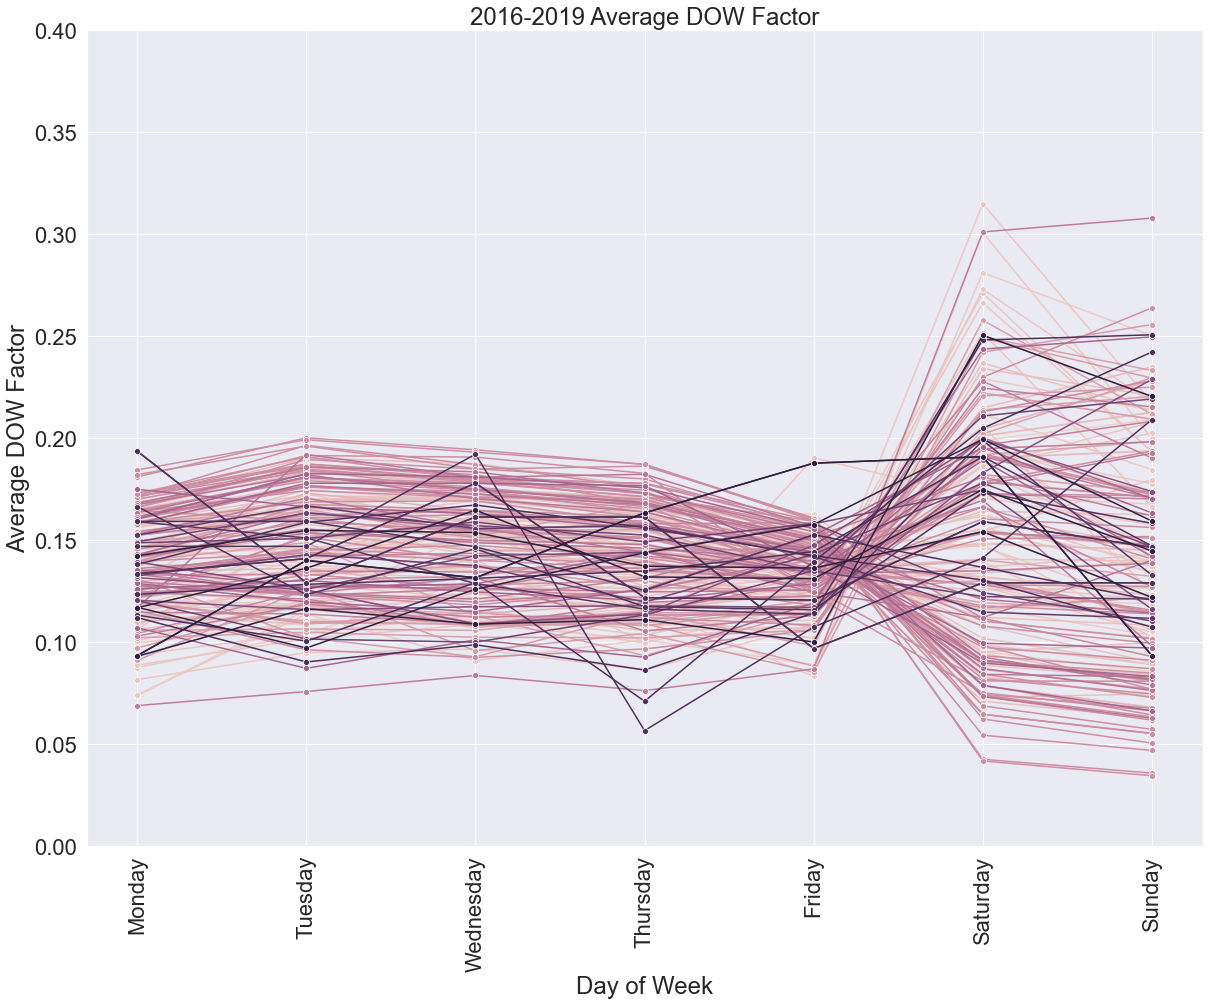

In [88]:
DOW_plot(DOW_ind)

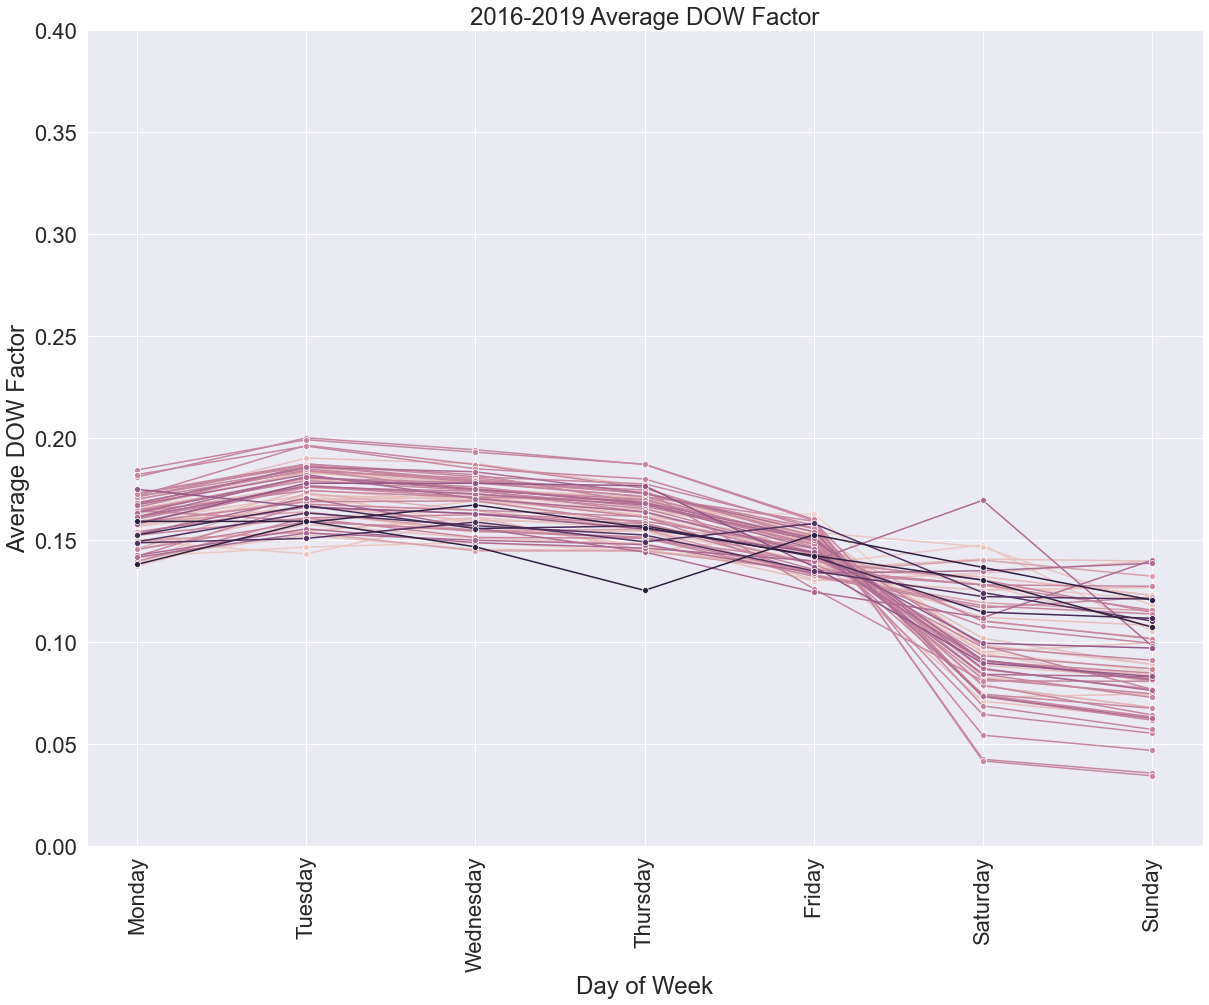

In [89]:
dow1=DOW_ind.loc[DOW_ind['Average_wwi']<=0.40]
dow1_ave=pd.DataFrame({'Average_Group_DOW_Factor':dow1.groupby(['Day of Week'])['Average_Yearly_DOW_Factor'].mean()}).reset_index()
DOW_plot(dow1)

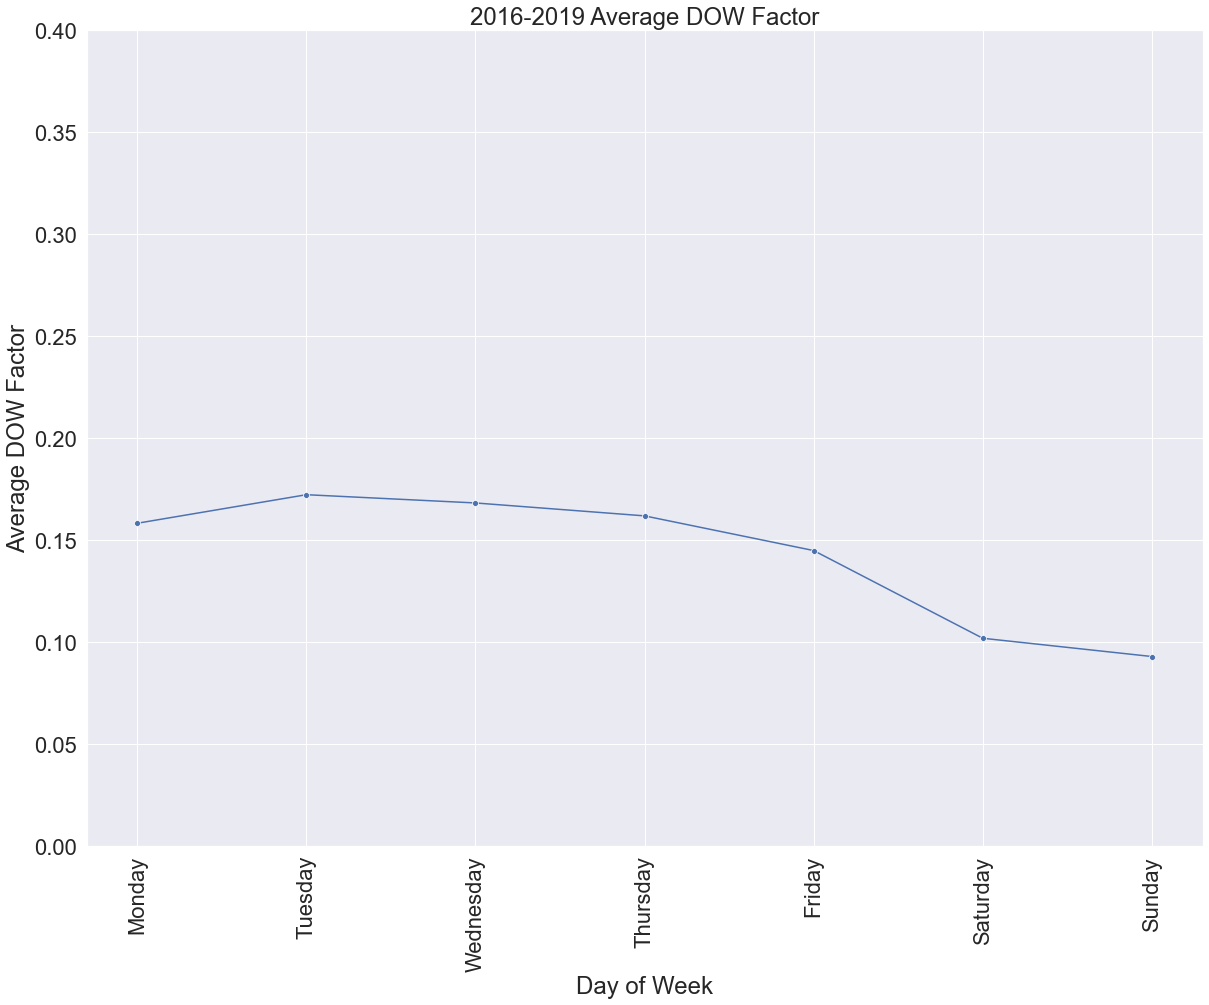

In [90]:
DOW_plot_ave(dow1_ave)

In [91]:
#dow2=DOW_ind[(DOW_ind.Average_wwi>0.35) & (DOW_ind.Average_wwi<=0.90)]
#DOW_plot(dow2)

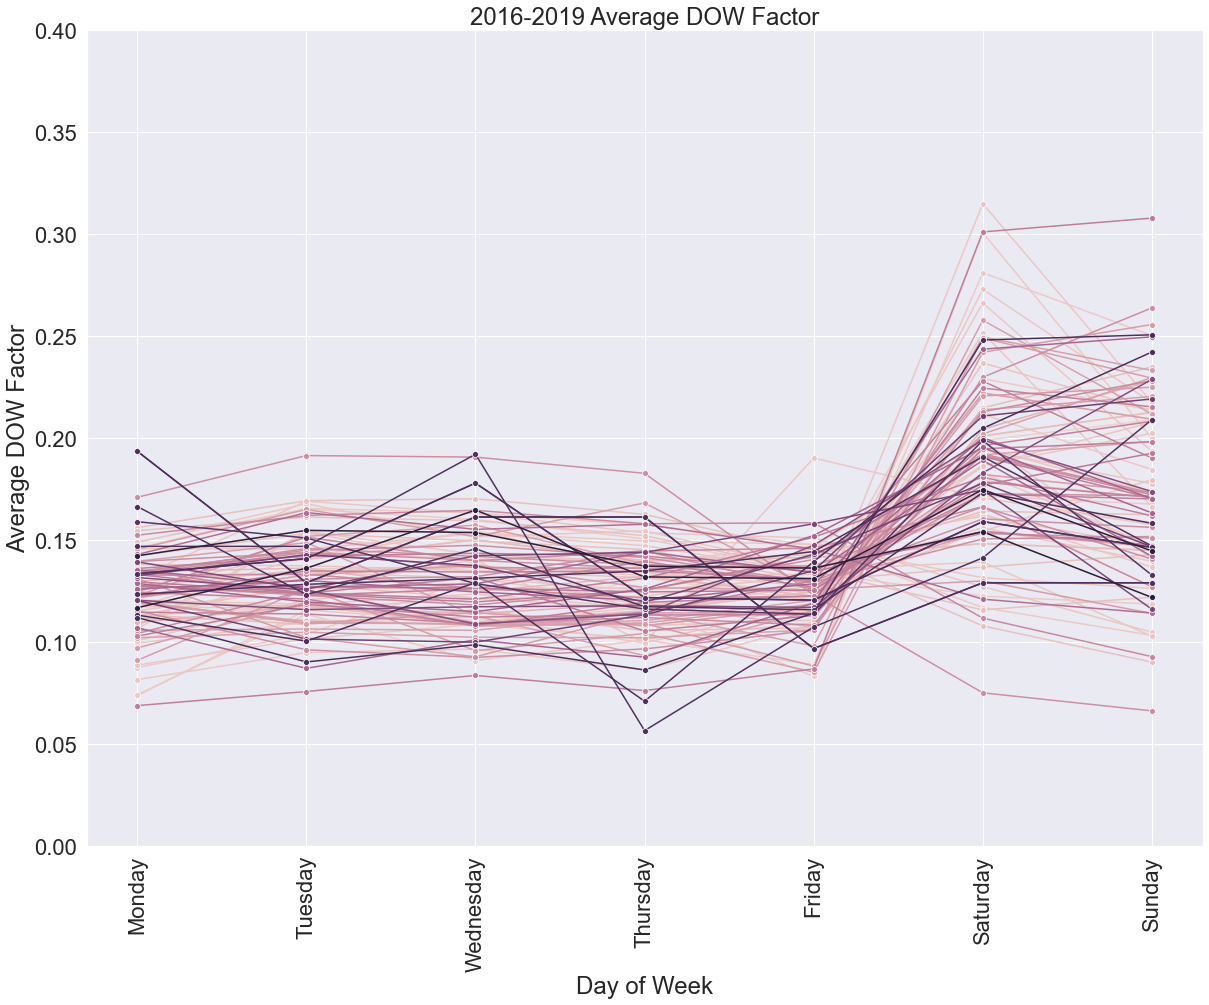

In [92]:
dow2=DOW_ind.loc[DOW_ind['Average_wwi']>0.40]
dow2_ave=pd.DataFrame({'Average_Group_DOW_Factor':dow2.groupby(['Day of Week'])['Average_Yearly_DOW_Factor'].mean()}).reset_index()
DOW_plot(dow2)

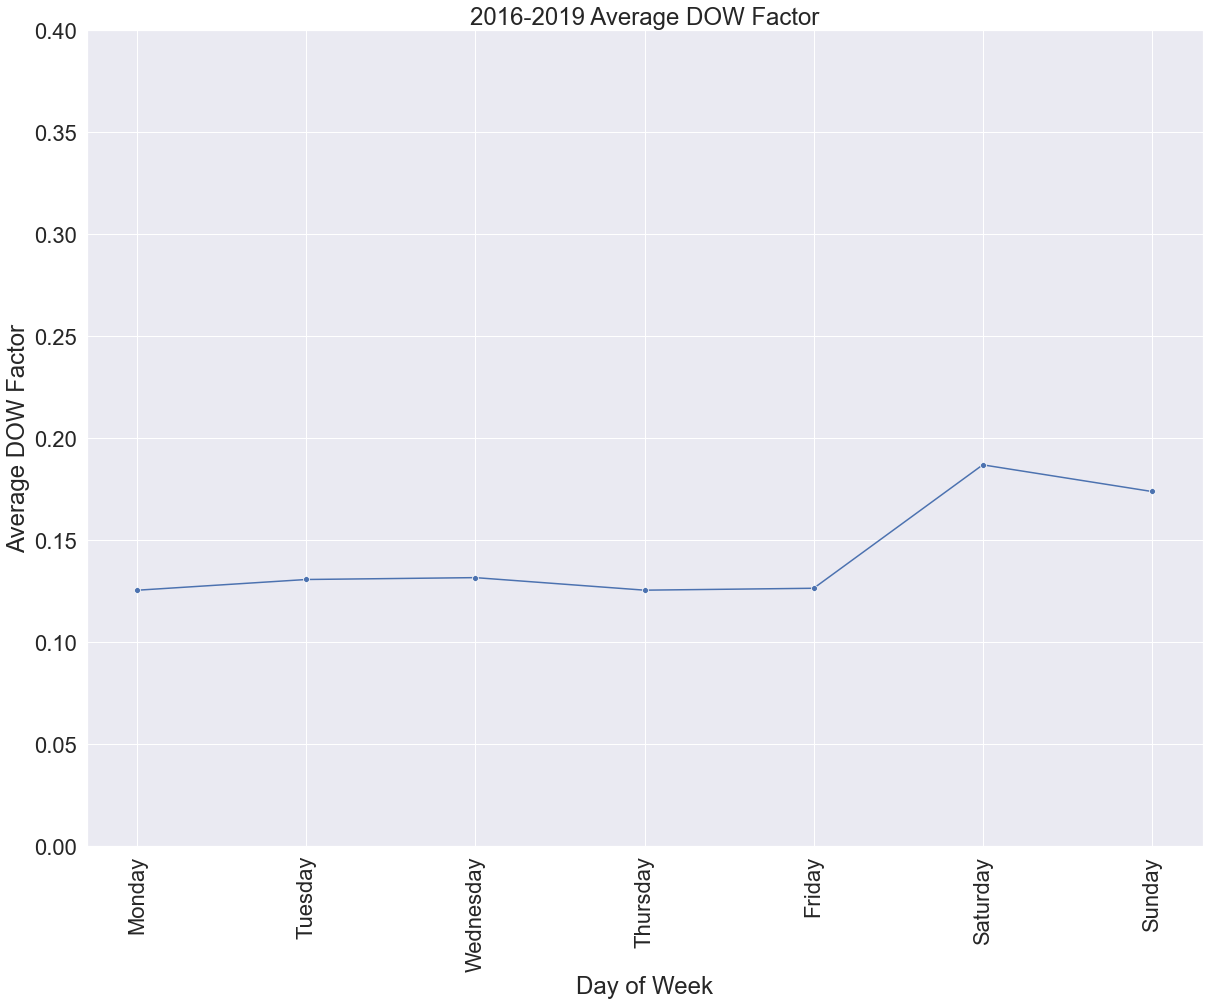

In [93]:
DOW_plot_ave(dow2_ave)

In [98]:
# export final DOW factor
dow1_ave['criteria']='WWI<=0.40'
dow2_ave['criteria']='WWI>0.40'
final_wwi=pd.concat([dow1_ave,dow2_ave],axis=0)
final_wwi.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Final_DOW_Factor.csv')

# Breakdown MOY Pattern by seasonality factor

In [99]:
moy=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_MOY.csv')

In [100]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am/pm_value', 'max_weekend_am/pm', 'max_weekend_am_pm_Value',
       'max_weekday_am/pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [101]:
ses_pa=pd.DataFrame({'Average_seasonal_factor':ind.groupby(['ID'])['seasonal_factor'].mean()}).reset_index()
ses_pa.shape

(184, 2)

In [102]:
ses_pa.head()

ID  Average_seasonal_factor
0   671                 1.307740
1  1127                 0.982447
2  2415                 1.407160
3  2694                 1.243470
4  2695                 1.347243

In [103]:
# extract seasonality factor to classify geographically
uniq_lat_long=ind.drop_duplicates(subset=['ID'], keep='first')
uniq_lat_long1=uniq_lat_long[['ID','latitude', 'longitude','location', 'road', 'city', 'county', 'state','country' ]]
graphical_seasonality=pd.merge(uniq_lat_long1,ses_pa,left_on=['ID'],right_on=['ID'],how='inner')
graphical_seasonality.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_average_seasonality.csv')

In [104]:
MOY_ind=pd.merge(moy,ses_pa,left_on=['ID'],right_on=['ID'],how='inner')
MOY_ind.shape

(1814, 5)

In [105]:
check_anomally=MOY_ind.loc[MOY_ind['Average_seasonal_factor']>3]
check_anomally

Unnamed: 0     ID  month  Average_Yearly_MOY_Factor  \
59            59   2698      1                   0.053352   
60            60   2698      2                   0.099987   
61            61   2698      3                   0.036309   
62            62   2698      4                   0.123275   
63            63   2698      5                   0.116792   
64            64   2698      6                   0.096783   
65            65   2698      7                   0.085635   
66            66   2698      8                   0.074211   
67            67   2698      9                   0.115655   
68            68   2698     10                   0.093488   
69            69   2698     11                   0.074985   
70            70   2698     12                   0.056204   
809          833  13426      1                   0.027108   
810          834  13426      2                   0.031167   
811          835  13426      3                   0.069201   
812          836  13426      4                   0.145641   
813          837  13426      5                   0.133800   
814          838  13426      6                   0.114335   
815          839  13426      7                   0.106726   
816          840  13426      8                   0.081189   
817          841  13426      9                   0.097695   
818          842  13426     10                   0.103575   
819          843  13426     11                   0.054566   
820          844  13426     12                   0.034995   
1661        1853  30665      1                   0.017640   
1662        1854  30665      2                   0.010862   
1663        1855  30665      4                   0.053176   
1664        1856  30665      5                   0.071015   
1665        1857  30665      6                   0.161855   
1666        1858  30665      7                   0.278446   
1667        1859  30665      8                   0.168463   
1668        1860  30665      9                   0.132445   
1669        1861  30665     10                   0.063925   
1670        1862  30665     11                   0.039053   
1671        1863  30665     12                   0.003120   
1743        2053  50992      1                   0.019490   
1744        2054  50992      2                   0.012478   
1745        2055  50992      3                   0.002552   
1746        2056  50992      4                   0.040192   
1747        2057  50992      5                   0.060713   
1748        2058  50992      6                   0.153600   
1749        2059  50992      7                   0.287620   
1750        2060  50992      8                   0.166723   
1751        2061  50992      9                   0.143017   
1752        2062  50992     10                   0.075769   
1753        2063  50992     11                   0.022622   
1754        2064  50992     12                   0.015223   
1755        2076  51027      1                   0.015872   
1756        2077  51027      2                   0.028353   
1757        2078  51027      3                   0.003852   
1758        2079  51027      4                   0.116265   
1759        2080  51027      5                   0.112258   
1760        2081  51027      6                   0.189999   
1761        2082  51027      8                   0.187380   
1762        2083  51027      9                   0.185222   
1763        2084  51027     10                   0.116650   
1764        2085  51027     11                   0.040681   
1765        2086  51027     12                   0.003467   

      Average_seasonal_factor  
59                   4.236054  
60                   4.236054  
61                   4.236054  
62                   4.236054  
63                   4.236054  
64                   4.236054  
65                   4.236054  
66                   4.236054  
67                   4.236054  
68                   4.236054  
69                   4.236054  
70                   4

In [106]:
def MOY_plot (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=MOY_ind['month'],y=MOY_ind['Average_Yearly_MOY_Factor'],hue=MOY_ind['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Average MOY Factor')
    ax.set_ylabel('Average MOY Factor' )
    ax.set_xlabel('Month')
    plt.show()

In [107]:
def MOY_plot_ave (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=MOY_ind['month'],y=MOY_ind['Average_Group_MOY_Factor'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.title.set_text('2016-2019 Average MOY Factor')
    ax.set_ylabel('Average MOY Factor' )
    ax.set_xlabel('Month')
    plt.show()

In [108]:
d1m=MOY_ind.loc[MOY_ind['Average_seasonal_factor']<=2.4]
d1m_ave=pd.DataFrame({'Average_Group_MOY_Factor':d1m.groupby(['month'])['Average_Yearly_MOY_Factor'].mean()}).reset_index()
d2m=MOY_ind[(MOY_ind.Average_seasonal_factor>2.4)& (MOY_ind.Average_seasonal_factor<=5) ]
d2m_ave=pd.DataFrame({'Average_Group_MOY_Factor':d2m.groupby(['month'])['Average_Yearly_MOY_Factor'].mean()}).reset_index()
d3m=MOY_ind.loc[MOY_ind['Average_seasonal_factor']>5.0]
d3m_ave=pd.DataFrame({'Average_Group_MOY_Factor':d3m.groupby(['month'])['Average_Yearly_MOY_Factor'].mean()}).reset_index()

In [109]:
d1m.head()

Unnamed: 0   ID  month  Average_Yearly_MOY_Factor  Average_seasonal_factor
0           0  671      1                   0.071662                  1.30774
1           1  671      2                   0.067068                  1.30774
2           2  671      3                   0.065518                  1.30774
3           3  671      4                   0.096624                  1.30774
4           4  671      5                   0.102273                  1.30774

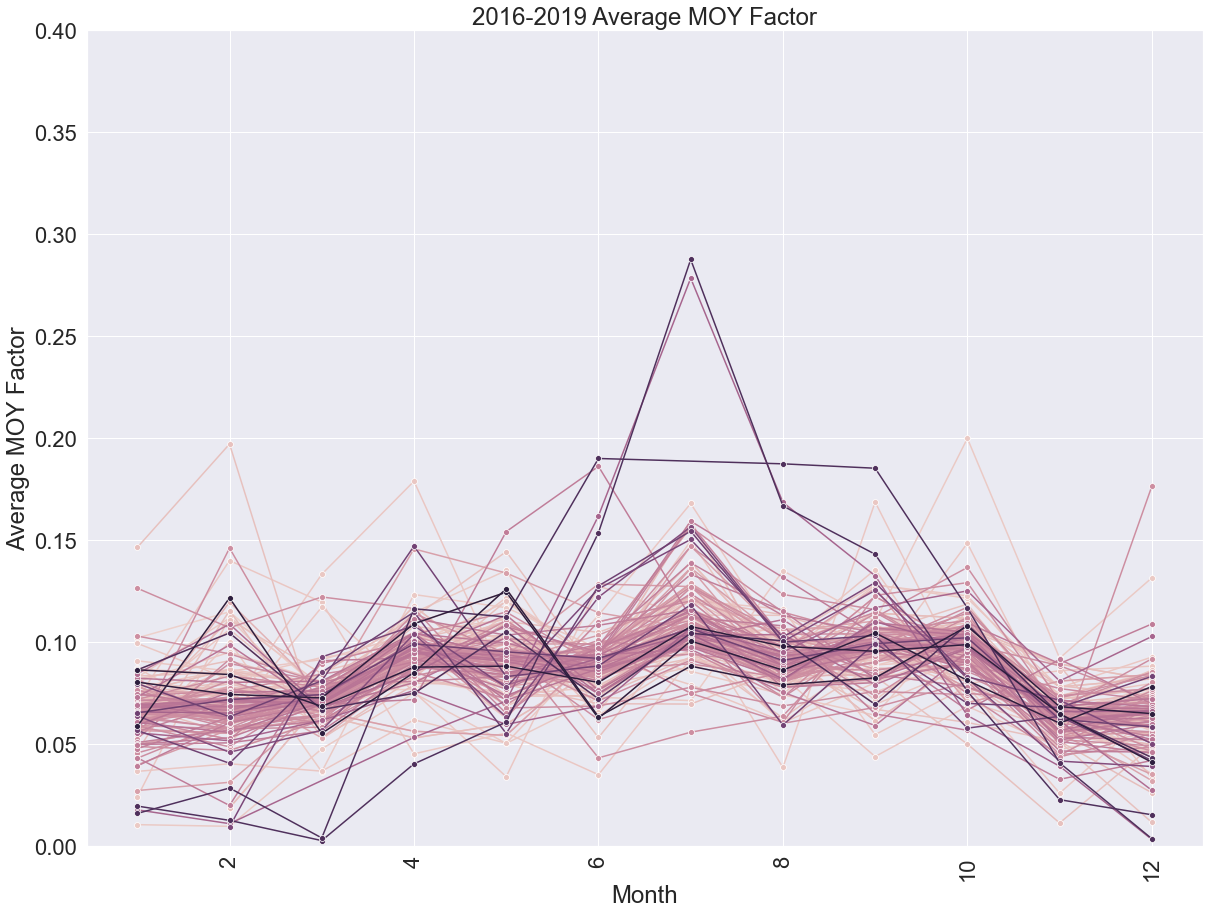

In [110]:
# all four years
MOY_plot(MOY_ind)

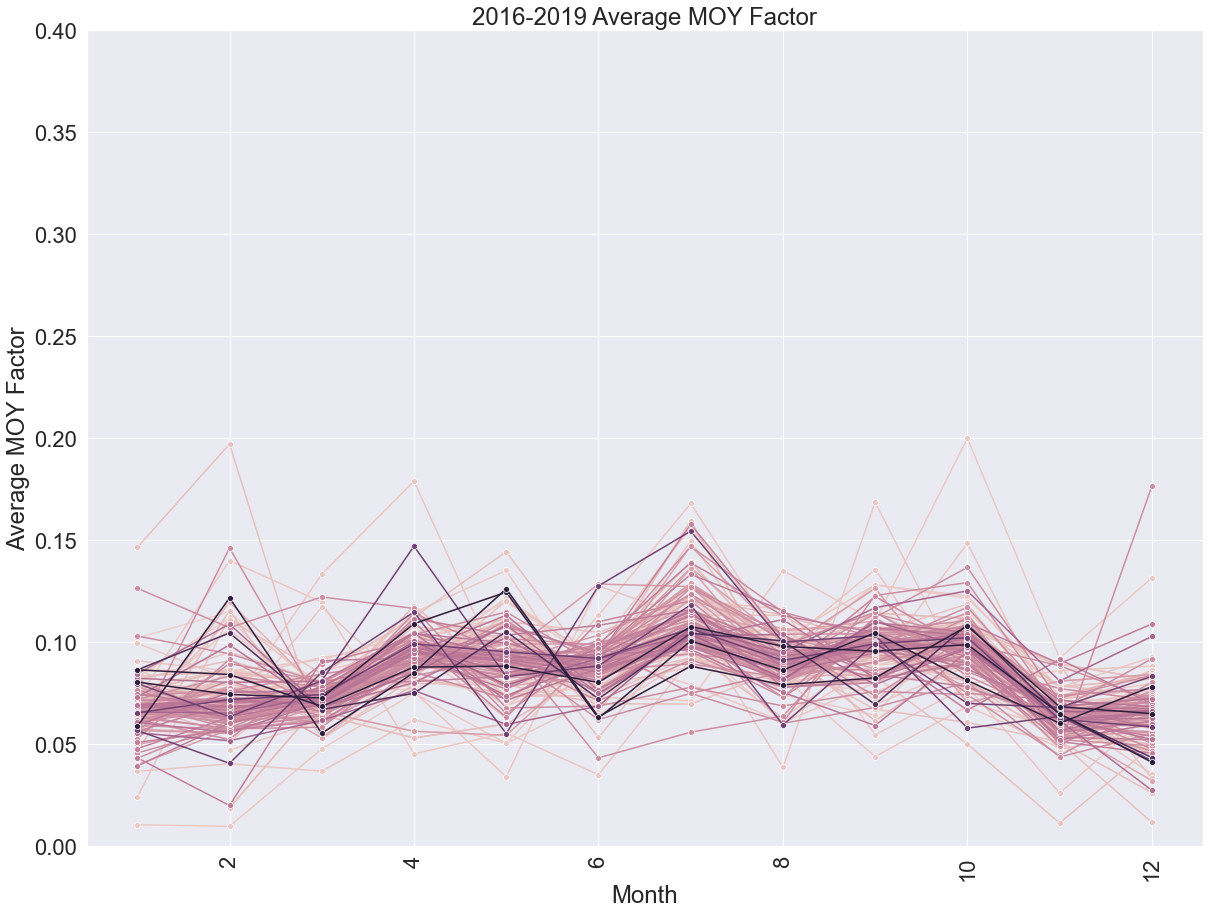

In [111]:
MOY_plot(d1m)

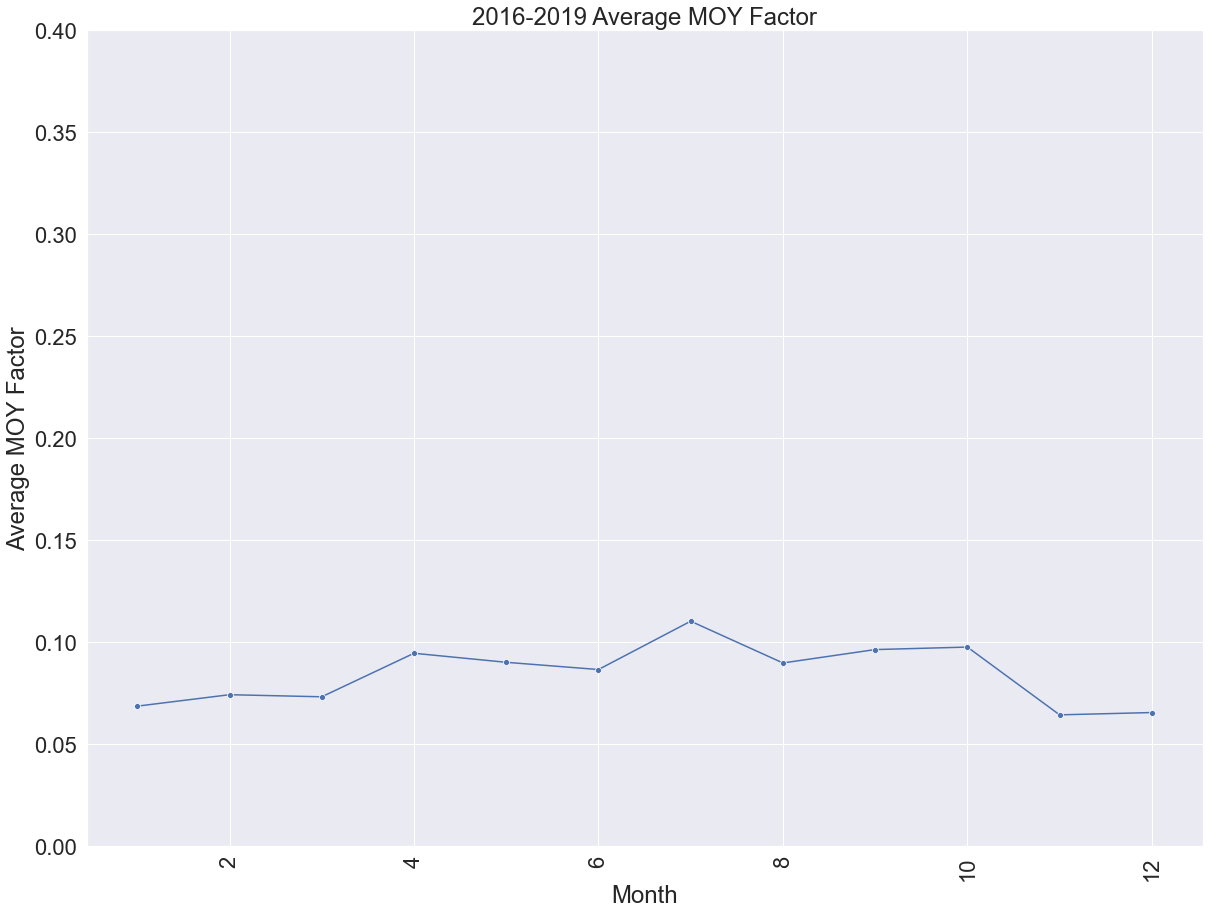

In [112]:
MOY_plot_ave(d1m_ave)

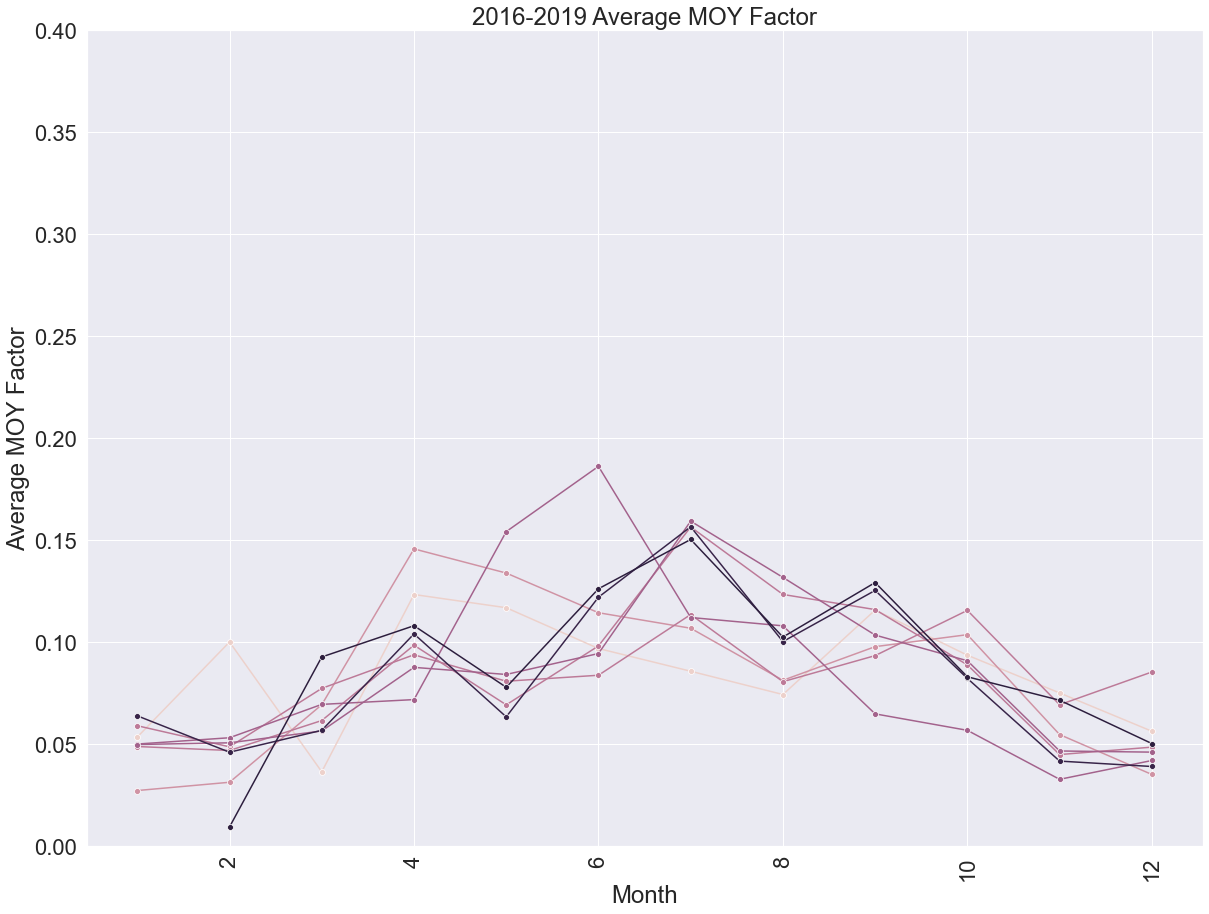

In [113]:
MOY_plot(d2m)

In [114]:
d2m_v1=d2m.drop_duplicates(subset=['ID'], keep='first')
d2m_v1.shape

(8, 5)

In [115]:
# check are these counter located
c=ind['ID'].isin(d2m_v1['ID'])
loc_id=ind[c]
loc_id_v1=loc_id.drop_duplicates(subset=['ID'], keep='first')
loc_id_v1.shape

(8, 40)

In [116]:
loc_id_v1.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/MOY_factorseasonality2_5c.csv')

In [117]:
loc_id_v1.groupby(['county'])['county'].count()

county
Alameda County     1
Humboldt County    1
Orange County      2
Name: county, dtype: int64

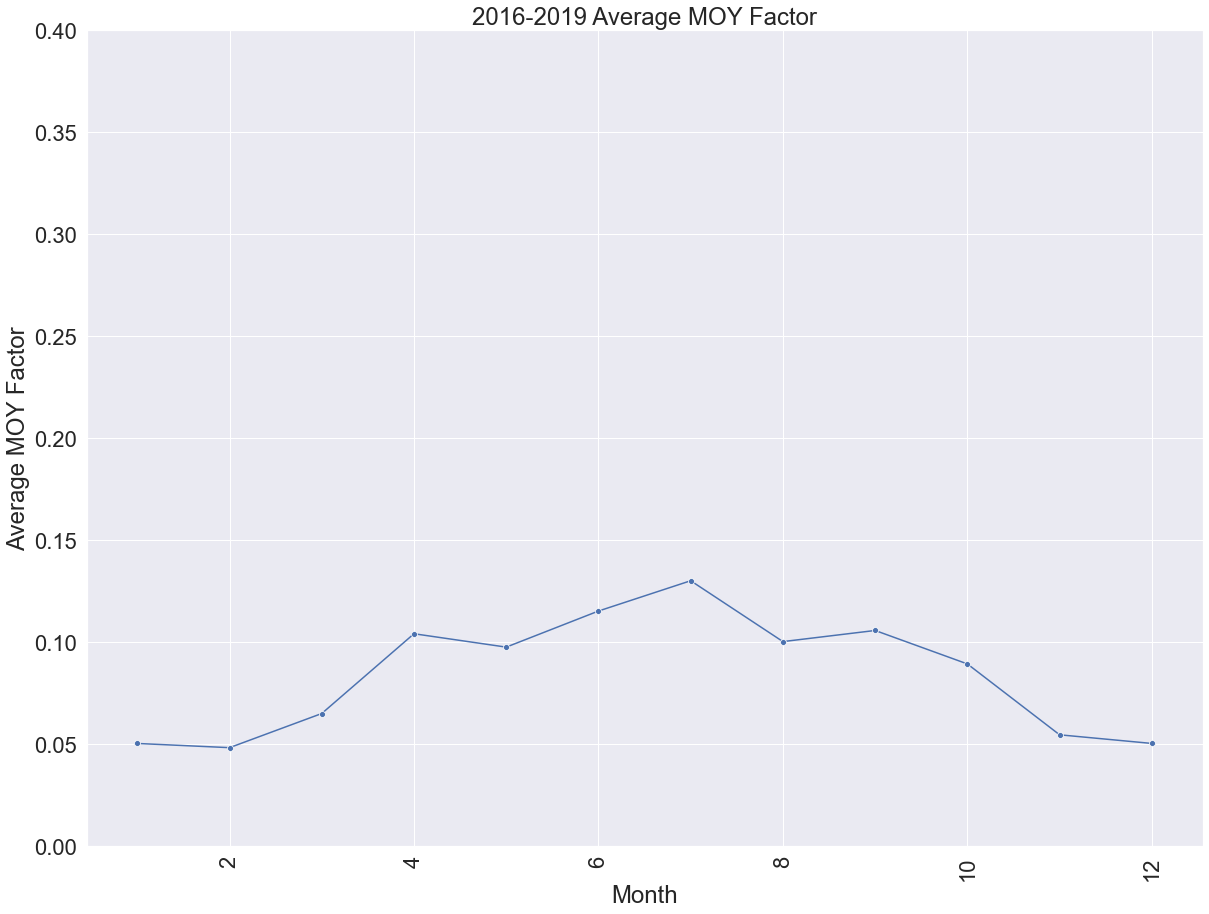

In [118]:
MOY_plot_ave(d2m_ave)

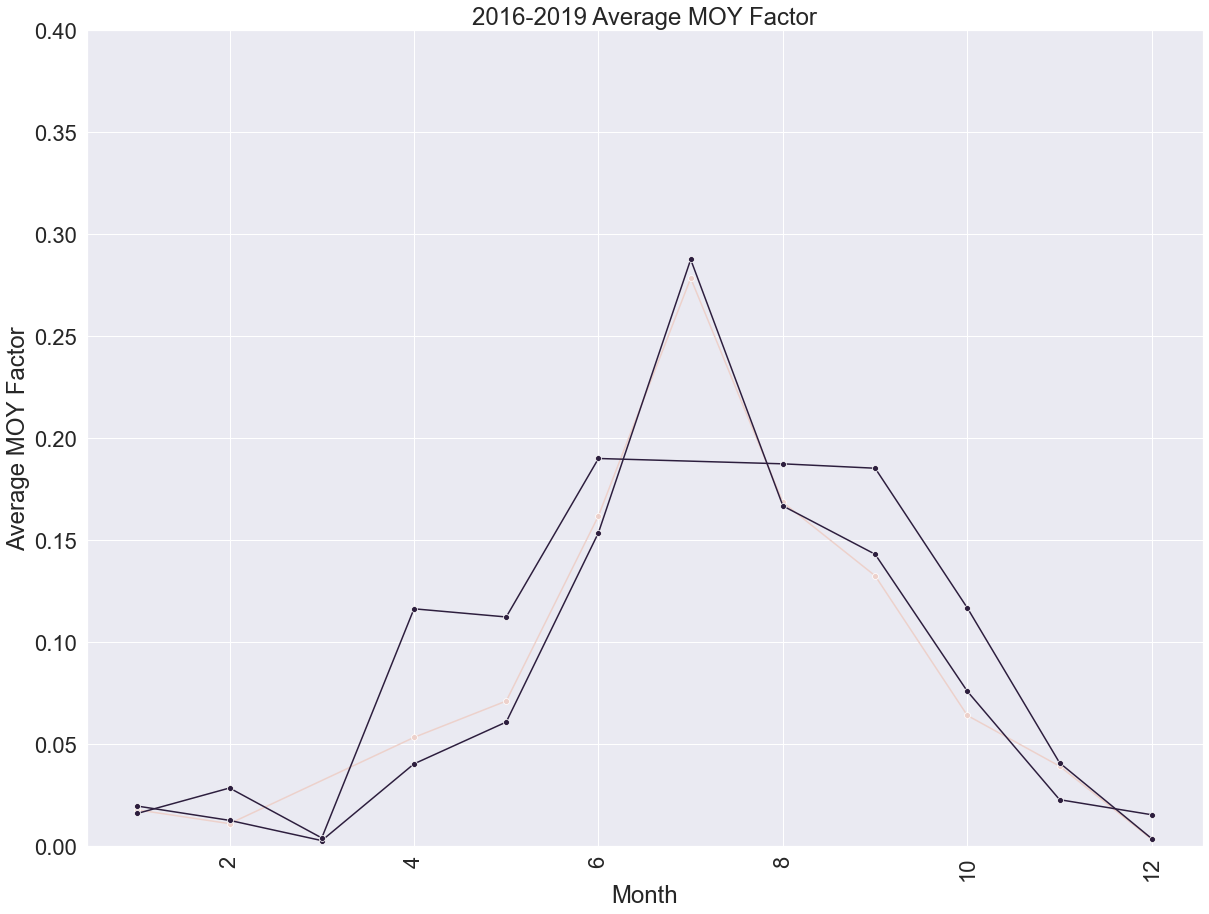

In [119]:
MOY_plot(d3m)

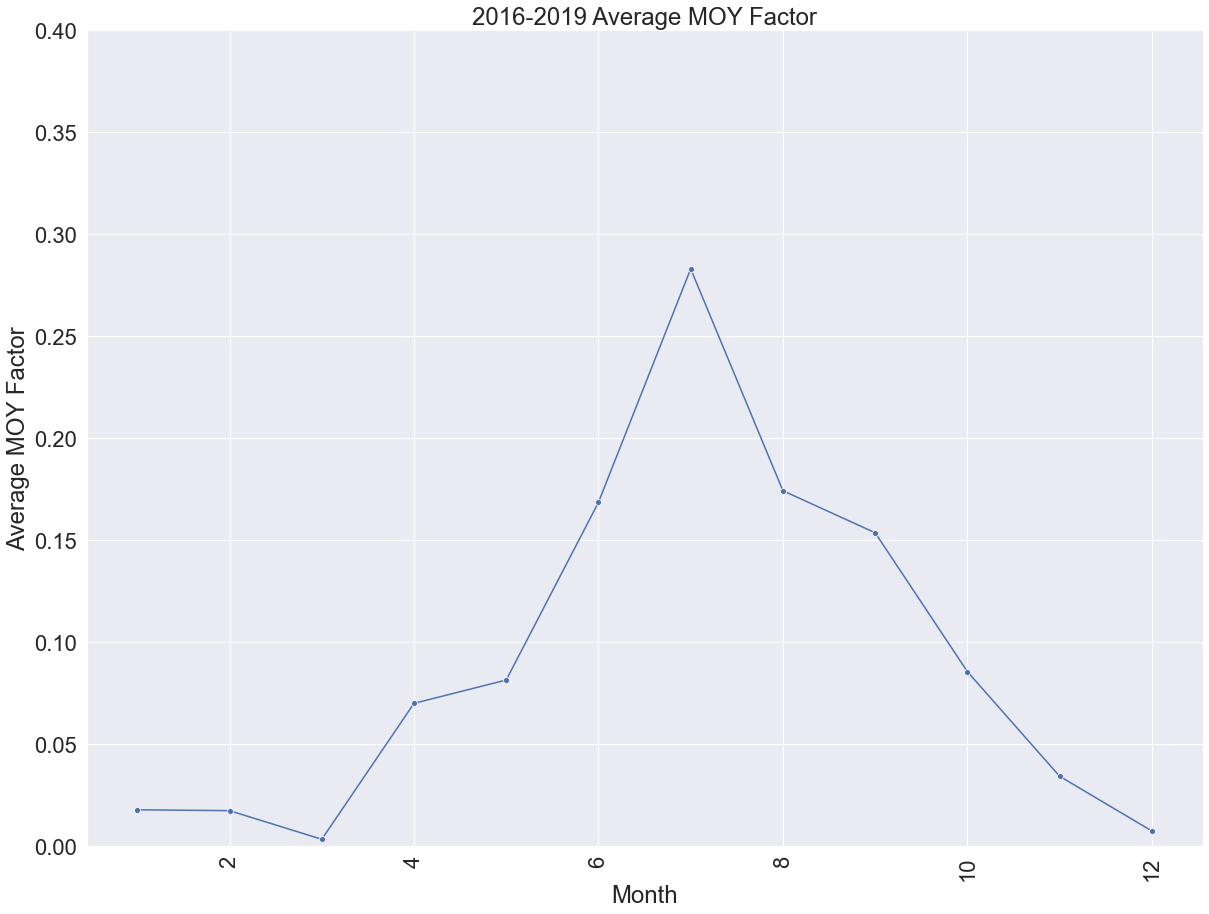

In [120]:
MOY_plot_ave(d3m_ave)

In [123]:
# export final MOY Factor by seasonality
d1m_ave['Criteria']='seasonal_factor<=2.4'
d2m_ave['Criteria']='2.4<seasonal_factor<=5'
d3m_ave['Criteria']='seasonal_factor>5'
final_MOY=pd.concat([d1m_ave,d2m_ave,d3m_ave],axis=0)
final_MOY.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Final_MOY_Factor.csv')

# End of the Code